In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
n_units=256
#n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 256)              768       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 256)              65792     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 256)              65792     
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [28]:
tsr_theta_train.shape

(394, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 0.0239 - rmse: 0.1545
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 3/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0197 - rmse: 0.1403
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 5/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 6/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 7/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 8/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 9/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 85/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 87/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 90/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 91/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 92/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 93/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 168/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 169/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1298
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.1144
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.1146
Epoch 417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1144
Epoch 418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0921
Epoch 581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0909
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 664/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 668/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 747/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 749/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 750/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 832/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 908/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 909/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 910/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 911/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 912/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 914/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 988/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 991/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 992/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 994/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 995/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1073/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1074/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 1075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1076/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1077/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1079/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 1153/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1156/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 1157/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 1158/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 1159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1161/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 1234/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1235/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1238/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1239/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1316/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1317/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1320/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 1321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 1323/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 1324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1325/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 1398/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 1399/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 1400/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 1401/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 1403/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 1404/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 1405/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 1480/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1483/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 1486/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1487/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 1489/10000


10/10 [==============================] - 0s 4ms/step - loss: 8.6802e-04 - rmse: 0.0295
Epoch 1559/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6101e-04 - rmse: 0.0293
Epoch 1560/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7729e-04 - rmse: 0.0296
Epoch 1561/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8054e-04 - rmse: 0.0297
Epoch 1562/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7217e-04 - rmse: 0.0295
Epoch 1563/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6685e-04 - rmse: 0.0294
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6272e-04 - rmse: 0.0294
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4808e-04 - rmse: 0.0291
Epoch 1566/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5890e-04 - rmse: 0.0293
Epoch 1567/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6

10/10 [==============================] - 0s 4ms/step - loss: 7.1907e-04 - rmse: 0.0268
Epoch 1637/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1824e-04 - rmse: 0.0268
Epoch 1638/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2160e-04 - rmse: 0.0269
Epoch 1639/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0740e-04 - rmse: 0.0266
Epoch 1640/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0589e-04 - rmse: 0.0266
Epoch 1641/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0966e-04 - rmse: 0.0266
Epoch 1642/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1891e-04 - rmse: 0.0268
Epoch 1643/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2200e-04 - rmse: 0.0269
Epoch 1644/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9958e-04 - rmse: 0.0264
Epoch 1645/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1

10/10 [==============================] - 0s 4ms/step - loss: 6.2540e-04 - rmse: 0.0250
Epoch 1715/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0478e-04 - rmse: 0.0246
Epoch 1716/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8316e-04 - rmse: 0.0241
Epoch 1717/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9875e-04 - rmse: 0.0245
Epoch 1718/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9836e-04 - rmse: 0.0245
Epoch 1719/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9354e-04 - rmse: 0.0244
Epoch 1720/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3324e-04 - rmse: 0.0252
Epoch 1721/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2300e-04 - rmse: 0.0250
Epoch 1722/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8832e-04 - rmse: 0.0243
Epoch 1723/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.3146e-04 - rmse: 0.0231
Epoch 1793/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1416e-04 - rmse: 0.0227
Epoch 1794/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9697e-04 - rmse: 0.0223
Epoch 1795/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9740e-04 - rmse: 0.0223
Epoch 1796/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3365e-04 - rmse: 0.0231
Epoch 1797/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1579e-04 - rmse: 0.0227
Epoch 1798/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2638e-04 - rmse: 0.0229
Epoch 1799/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1747e-04 - rmse: 0.0227
Epoch 1800/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0727e-04 - rmse: 0.0225
Epoch 1801/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.3268e-04 - rmse: 0.0208
Epoch 1871/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4464e-04 - rmse: 0.0211
Epoch 1872/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3215e-04 - rmse: 0.0208
Epoch 1873/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3900e-04 - rmse: 0.0210
Epoch 1874/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4076e-04 - rmse: 0.0210
Epoch 1875/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4285e-04 - rmse: 0.0210
Epoch 1876/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3753e-04 - rmse: 0.0209
Epoch 1877/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2739e-04 - rmse: 0.0207
Epoch 1878/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2176e-04 - rmse: 0.0205
Epoch 1879/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 3.9958e-04 - rmse: 0.0200
Epoch 1949/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8372e-04 - rmse: 0.0196
Epoch 1950/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2009e-04 - rmse: 0.0205
Epoch 1951/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9647e-04 - rmse: 0.0199
Epoch 1952/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9532e-04 - rmse: 0.0199
Epoch 1953/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9743e-04 - rmse: 0.0199
Epoch 1954/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0851e-04 - rmse: 0.0202
Epoch 1955/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3766e-04 - rmse: 0.0209
Epoch 1956/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0575e-04 - rmse: 0.0201
Epoch 1957/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.3285e-04 - rmse: 0.0182
Epoch 2027/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2976e-04 - rmse: 0.0182
Epoch 2028/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3787e-04 - rmse: 0.0184
Epoch 2029/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4928e-04 - rmse: 0.0187
Epoch 2030/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6102e-04 - rmse: 0.0190
Epoch 2031/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4702e-04 - rmse: 0.0186
Epoch 2032/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3764e-04 - rmse: 0.0184
Epoch 2033/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5105e-04 - rmse: 0.0187
Epoch 2034/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5064e-04 - rmse: 0.0187
Epoch 2035/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.2620e-04 - rmse: 0.0181
Epoch 2105/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1823e-04 - rmse: 0.0178
Epoch 2106/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1364e-04 - rmse: 0.0177
Epoch 2107/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0218e-04 - rmse: 0.0174
Epoch 2108/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2257e-04 - rmse: 0.0180
Epoch 2109/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4343e-04 - rmse: 0.0185
Epoch 2110/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2072e-04 - rmse: 0.0179
Epoch 2111/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0204e-04 - rmse: 0.0174
Epoch 2112/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9848e-04 - rmse: 0.0173
Epoch 2113/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 3.0092e-04 - rmse: 0.0173
Epoch 2183/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8973e-04 - rmse: 0.0170
Epoch 2184/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2030e-04 - rmse: 0.0179
Epoch 2185/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1738e-04 - rmse: 0.0178
Epoch 2186/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1987e-04 - rmse: 0.0179
Epoch 2187/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5019e-04 - rmse: 0.0187
Epoch 2188/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4567e-04 - rmse: 0.0186
Epoch 2189/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0857e-04 - rmse: 0.0176
Epoch 2190/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0460e-04 - rmse: 0.0175
Epoch 2191/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 2.6042e-04 - rmse: 0.0161
Epoch 2261/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5565e-04 - rmse: 0.0160
Epoch 2262/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5424e-04 - rmse: 0.0159
Epoch 2263/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5404e-04 - rmse: 0.0159
Epoch 2264/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6184e-04 - rmse: 0.0162
Epoch 2265/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4823e-04 - rmse: 0.0158
Epoch 2266/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4420e-04 - rmse: 0.0156
Epoch 2267/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5667e-04 - rmse: 0.0160
Epoch 2268/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8006e-04 - rmse: 0.0167
Epoch 2269/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.2815e-04 - rmse: 0.0151
Epoch 2339/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1474e-04 - rmse: 0.0147
Epoch 2340/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1312e-04 - rmse: 0.0146
Epoch 2341/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3304e-04 - rmse: 0.0153
Epoch 2342/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4685e-04 - rmse: 0.0157
Epoch 2343/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5275e-04 - rmse: 0.0159
Epoch 2344/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5393e-04 - rmse: 0.0159
Epoch 2345/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3312e-04 - rmse: 0.0153
Epoch 2346/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2986e-04 - rmse: 0.0152
Epoch 2347/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 4ms/step - loss: 2.0616e-04 - rmse: 0.0144
Epoch 2417/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1747e-04 - rmse: 0.0147
Epoch 2418/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2317e-04 - rmse: 0.0149
Epoch 2419/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2083e-04 - rmse: 0.0149
Epoch 2420/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0475e-04 - rmse: 0.0143
Epoch 2421/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1036e-04 - rmse: 0.0145
Epoch 2422/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0343e-04 - rmse: 0.0143
Epoch 2423/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0050e-04 - rmse: 0.0142
Epoch 2424/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9171e-04 - rmse: 0.0138
Epoch 2425/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8914e-04 - rmse: 0.0138
Epoch 2495/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8523e-04 - rmse: 0.0136
Epoch 2496/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9067e-04 - rmse: 0.0138
Epoch 2497/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9068e-04 - rmse: 0.0138
Epoch 2498/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8697e-04 - rmse: 0.0137
Epoch 2499/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8516e-04 - rmse: 0.0136
Epoch 2500/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8724e-04 - rmse: 0.0137
Epoch 2501/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1249e-04 - rmse: 0.0146
Epoch 2502/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0653e-04 - rmse: 0.0144
Epoch 2503/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8094e-04 - rmse: 0.0135
Epoch 2573/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8279e-04 - rmse: 0.0135
Epoch 2574/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6892e-04 - rmse: 0.0130
Epoch 2575/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6479e-04 - rmse: 0.0128
Epoch 2576/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7060e-04 - rmse: 0.0131
Epoch 2577/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7767e-04 - rmse: 0.0133
Epoch 2578/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7794e-04 - rmse: 0.0133
Epoch 2579/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8029e-04 - rmse: 0.0134
Epoch 2580/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7906e-04 - rmse: 0.0134
Epoch 2581/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6615e-04 - rmse: 0.0129
Epoch 2651/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6324e-04 - rmse: 0.0128
Epoch 2652/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6551e-04 - rmse: 0.0129
Epoch 2653/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6733e-04 - rmse: 0.0129
Epoch 2654/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5288e-04 - rmse: 0.0124
Epoch 2655/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5189e-04 - rmse: 0.0123
Epoch 2656/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5339e-04 - rmse: 0.0124
Epoch 2657/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5266e-04 - rmse: 0.0124
Epoch 2658/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5805e-04 - rmse: 0.0126
Epoch 2659/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.5250e-04 - rmse: 0.0123
Epoch 2729/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4401e-04 - rmse: 0.0120
Epoch 2730/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4812e-04 - rmse: 0.0122
Epoch 2731/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4901e-04 - rmse: 0.0122
Epoch 2732/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5133e-04 - rmse: 0.0123
Epoch 2733/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5016e-04 - rmse: 0.0123
Epoch 2734/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5668e-04 - rmse: 0.0125
Epoch 2735/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5962e-04 - rmse: 0.0126
Epoch 2736/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9865e-04 - rmse: 0.0141
Epoch 2737/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.5322e-04 - rmse: 0.0124
Epoch 2807/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5990e-04 - rmse: 0.0126
Epoch 2808/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8740e-04 - rmse: 0.0137
Epoch 2809/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9397e-04 - rmse: 0.0139
Epoch 2810/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9698e-04 - rmse: 0.0140
Epoch 2811/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7960e-04 - rmse: 0.0134
Epoch 2812/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5386e-04 - rmse: 0.0124
Epoch 2813/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4390e-04 - rmse: 0.0120
Epoch 2814/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3970e-04 - rmse: 0.0118
Epoch 2815/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.2825e-04 - rmse: 0.0113
Epoch 2885/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3558e-04 - rmse: 0.0116
Epoch 2886/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5709e-04 - rmse: 0.0125
Epoch 2887/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4340e-04 - rmse: 0.0120
Epoch 2888/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4053e-04 - rmse: 0.0119
Epoch 2889/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3773e-04 - rmse: 0.0117
Epoch 2890/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3574e-04 - rmse: 0.0117
Epoch 2891/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3121e-04 - rmse: 0.0115
Epoch 2892/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2422e-04 - rmse: 0.0111
Epoch 2893/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.2073e-04 - rmse: 0.0110
Epoch 2963/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1971e-04 - rmse: 0.0109
Epoch 2964/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2906e-04 - rmse: 0.0114
Epoch 2965/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2829e-04 - rmse: 0.0113
Epoch 2966/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7675e-04 - rmse: 0.0133
Epoch 2967/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1046e-04 - rmse: 0.0145
Epoch 2968/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5564e-04 - rmse: 0.0125
Epoch 2969/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3906e-04 - rmse: 0.0118
Epoch 2970/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3020e-04 - rmse: 0.0114
Epoch 2971/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.1080e-04 - rmse: 0.0105
Epoch 3041/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1686e-04 - rmse: 0.0108
Epoch 3042/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1827e-04 - rmse: 0.0109
Epoch 3043/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3295e-04 - rmse: 0.0115
Epoch 3044/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2327e-04 - rmse: 0.0111
Epoch 3045/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.2564e-04 - rmse: 0.0112
Epoch 3046/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2080e-04 - rmse: 0.0110
Epoch 3047/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1245e-04 - rmse: 0.0106
Epoch 3048/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0461e-04 - rmse: 0.0102
Epoch 3049/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.2450e-04 - rmse: 0.0112
Epoch 3119/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.1058e-04 - rmse: 0.0105
Epoch 3120/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.1764e-04 - rmse: 0.0108
Epoch 3121/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2708e-04 - rmse: 0.0113
Epoch 3122/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2605e-04 - rmse: 0.0112
Epoch 3123/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2794e-04 - rmse: 0.0113
Epoch 3124/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.1142e-04 - rmse: 0.0106
Epoch 3125/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1042e-04 - rmse: 0.0105
Epoch 3126/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1061e-04 - rmse: 0.0105
Epoch 3127/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.0188e-04 - rmse: 0.0101
Epoch 3197/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9404e-05 - rmse: 0.0100
Epoch 3198/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0683e-04 - rmse: 0.0103
Epoch 3199/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0361e-04 - rmse: 0.0102
Epoch 3200/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1659e-05 - rmse: 0.0096
Epoch 3201/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7994e-05 - rmse: 0.0094
Epoch 3202/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1197e-05 - rmse: 0.0095
Epoch 3203/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5605e-05 - rmse: 0.0098
Epoch 3204/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0057e-04 - rmse: 0.0100
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.4529e-05 - rmse: 0.0097
Epoch 3275/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1681e-05 - rmse: 0.0096
Epoch 3276/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3482e-05 - rmse: 0.0097
Epoch 3277/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9156e-05 - rmse: 0.0100
Epoch 3278/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1578e-04 - rmse: 0.0108
Epoch 3279/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1128e-04 - rmse: 0.0105
Epoch 3280/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2890e-05 - rmse: 0.0096
Epoch 3281/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9685e-05 - rmse: 0.0095
Epoch 3282/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9839e-05 - rmse: 0.0095
Epoch 3283/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.1336e-04 - rmse: 0.0106
Epoch 3353/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1040e-04 - rmse: 0.0105
Epoch 3354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1004e-04 - rmse: 0.0105
Epoch 3355/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0945e-04 - rmse: 0.0105
Epoch 3356/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0624e-04 - rmse: 0.0103
Epoch 3357/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7730e-05 - rmse: 0.0099
Epoch 3358/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7821e-05 - rmse: 0.0094
Epoch 3359/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4456e-05 - rmse: 0.0092
Epoch 3360/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3115e-05 - rmse: 0.0096
Epoch 3361/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 1.0460e-04 - rmse: 0.0102
Epoch 3431/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1080e-04 - rmse: 0.0105
Epoch 3432/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1119e-04 - rmse: 0.0105
Epoch 3433/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4083e-04 - rmse: 0.0119
Epoch 3434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0860e-04 - rmse: 0.0104
Epoch 3435/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2333e-05 - rmse: 0.0096
Epoch 3436/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1274e-05 - rmse: 0.0096
Epoch 3437/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1261e-05 - rmse: 0.0096
Epoch 3438/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9986e-05 - rmse: 0.0095
Epoch 3439/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 9.1144e-05 - rmse: 0.0095
Epoch 3509/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8997e-05 - rmse: 0.0094
Epoch 3510/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0274e-04 - rmse: 0.0101
Epoch 3511/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1207e-04 - rmse: 0.0106
Epoch 3512/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7325e-05 - rmse: 0.0093
Epoch 3513/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9857e-05 - rmse: 0.0089
Epoch 3514/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9750e-05 - rmse: 0.0089
Epoch 3515/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9501e-05 - rmse: 0.0089
Epoch 3516/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6445e-05 - rmse: 0.0093
Epoch 3517/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1

10/10 [==============================] - 0s 4ms/step - loss: 7.6285e-05 - rmse: 0.0087
Epoch 3587/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4603e-05 - rmse: 0.0086
Epoch 3588/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0848e-05 - rmse: 0.0090
Epoch 3589/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0665e-05 - rmse: 0.0090
Epoch 3590/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3090e-05 - rmse: 0.0096
Epoch 3591/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5267e-05 - rmse: 0.0092
Epoch 3592/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5858e-05 - rmse: 0.0087
Epoch 3593/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4534e-05 - rmse: 0.0086
Epoch 3594/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8681e-05 - rmse: 0.0083
Epoch 3595/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.5827e-05 - rmse: 0.0081
Epoch 3665/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4529e-05 - rmse: 0.0080
Epoch 3666/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3508e-05 - rmse: 0.0080
Epoch 3667/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0138e-05 - rmse: 0.0084
Epoch 3668/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3467e-05 - rmse: 0.0086
Epoch 3669/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5964e-05 - rmse: 0.0087
Epoch 3670/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4076e-05 - rmse: 0.0086
Epoch 3671/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1808e-05 - rmse: 0.0085
Epoch 3672/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0282e-05 - rmse: 0.0090
Epoch 3673/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 6.4786e-05 - rmse: 0.0080
Epoch 3743/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4658e-05 - rmse: 0.0080
Epoch 3744/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9175e-05 - rmse: 0.0083
Epoch 3745/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1053e-05 - rmse: 0.0090
Epoch 3746/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2501e-05 - rmse: 0.0085
Epoch 3747/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8063e-05 - rmse: 0.0083
Epoch 3748/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3913e-05 - rmse: 0.0097
Epoch 3749/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0514e-05 - rmse: 0.0095
Epoch 3750/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3648e-05 - rmse: 0.0091
Epoch 3751/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 7.5610e-05 - rmse: 0.0087
Epoch 3821/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6781e-05 - rmse: 0.0082
Epoch 3822/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3952e-05 - rmse: 0.0080
Epoch 3823/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5247e-05 - rmse: 0.0081
Epoch 3824/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3033e-05 - rmse: 0.0079
Epoch 3825/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7129e-05 - rmse: 0.0088
Epoch 3826/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1624e-05 - rmse: 0.0090
Epoch 3827/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7975e-05 - rmse: 0.0094
Epoch 3828/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8205e-05 - rmse: 0.0083
Epoch 3829/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 5.7882e-05 - rmse: 0.0076
Epoch 3899/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3641e-05 - rmse: 0.0073
Epoch 3900/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2210e-05 - rmse: 0.0079
Epoch 3901/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5259e-05 - rmse: 0.0074
Epoch 3902/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5240e-05 - rmse: 0.0074
Epoch 3903/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2760e-05 - rmse: 0.0073
Epoch 3904/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3976e-05 - rmse: 0.0073
Epoch 3905/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7427e-05 - rmse: 0.0076
Epoch 3906/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4749e-05 - rmse: 0.0080
Epoch 3907/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6

10/10 [==============================] - 0s 4ms/step - loss: 4.6543e-05 - rmse: 0.0068
Epoch 3977/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7988e-05 - rmse: 0.0069
Epoch 3978/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7850e-05 - rmse: 0.0069
Epoch 3979/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2997e-05 - rmse: 0.0073
Epoch 3980/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4181e-05 - rmse: 0.0074
Epoch 3981/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1866e-05 - rmse: 0.0072
Epoch 3982/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1429e-05 - rmse: 0.0072
Epoch 3983/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0296e-05 - rmse: 0.0071
Epoch 3984/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1024e-05 - rmse: 0.0071
Epoch 3985/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 6.2155e-05 - rmse: 0.0079
Epoch 4055/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5862e-05 - rmse: 0.0075
Epoch 4056/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7993e-05 - rmse: 0.0076
Epoch 4057/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5561e-05 - rmse: 0.0075
Epoch 4058/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1297e-05 - rmse: 0.0078
Epoch 4059/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6642e-05 - rmse: 0.0075
Epoch 4060/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2946e-05 - rmse: 0.0073
Epoch 4061/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2400e-05 - rmse: 0.0079
Epoch 4062/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1388e-05 - rmse: 0.0078
Epoch 4063/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0

10/10 [==============================] - 0s 5ms/step - loss: 5.9303e-05 - rmse: 0.0077
Epoch 4133/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4725e-05 - rmse: 0.0074
Epoch 4134/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0278e-05 - rmse: 0.0071
Epoch 4135/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2357e-05 - rmse: 0.0072
Epoch 4136/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9959e-05 - rmse: 0.0071
Epoch 4137/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7846e-05 - rmse: 0.0069
Epoch 4138/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9755e-05 - rmse: 0.0071
Epoch 4139/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3774e-05 - rmse: 0.0073
Epoch 4140/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4441e-05 - rmse: 0.0074
Epoch 4141/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 8.5254e-05 - rmse: 0.0092
Epoch 4211/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7784e-05 - rmse: 0.0082
Epoch 4212/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5173e-05 - rmse: 0.0074
Epoch 4213/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6635e-05 - rmse: 0.0068
Epoch 4214/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9206e-05 - rmse: 0.0070
Epoch 4215/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7371e-05 - rmse: 0.0069
Epoch 4216/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1722e-05 - rmse: 0.0072
Epoch 4217/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1256e-05 - rmse: 0.0072
Epoch 4218/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0426e-05 - rmse: 0.0071
Epoch 4219/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 6.3066e-05 - rmse: 0.0079
Epoch 4289/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8160e-05 - rmse: 0.0094
Epoch 4290/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1107e-05 - rmse: 0.0090
Epoch 4291/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2546e-05 - rmse: 0.0096
Epoch 4292/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0523e-04 - rmse: 0.0103
Epoch 4293/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0567e-05 - rmse: 0.0090
Epoch 4294/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4127e-05 - rmse: 0.0086
Epoch 4295/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6644e-05 - rmse: 0.0082
Epoch 4296/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8668e-05 - rmse: 0.0077
Epoch 4297/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 4ms/step - loss: 6.7624e-05 - rmse: 0.0082
Epoch 4367/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3653e-05 - rmse: 0.0091
Epoch 4368/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9172e-05 - rmse: 0.0089
Epoch 4369/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7158e-05 - rmse: 0.0082
Epoch 4370/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1297e-05 - rmse: 0.0072
Epoch 4371/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4011e-05 - rmse: 0.0073
Epoch 4372/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0255e-05 - rmse: 0.0071
Epoch 4373/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4959e-05 - rmse: 0.0067
Epoch 4374/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5906e-05 - rmse: 0.0068
Epoch 4375/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 7.3908e-05 - rmse: 0.0086
Epoch 4445/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7560e-05 - rmse: 0.0076
Epoch 4446/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6419e-05 - rmse: 0.0068
Epoch 4447/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4166e-05 - rmse: 0.0066
Epoch 4448/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1366e-05 - rmse: 0.0064
Epoch 4449/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6886e-05 - rmse: 0.0068
Epoch 4450/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4378e-05 - rmse: 0.0067
Epoch 4451/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0673e-05 - rmse: 0.0064
Epoch 4452/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0779e-05 - rmse: 0.0064
Epoch 4453/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 4.3753e-05 - rmse: 0.0066
Epoch 4523/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2280e-05 - rmse: 0.0065
Epoch 4524/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0989e-05 - rmse: 0.0071
Epoch 4525/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0032e-05 - rmse: 0.0077
Epoch 4526/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2011e-05 - rmse: 0.0072
Epoch 4527/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5876e-05 - rmse: 0.0068
Epoch 4528/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3813e-05 - rmse: 0.0066
Epoch 4529/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2420e-05 - rmse: 0.0065
Epoch 4530/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0477e-05 - rmse: 0.0064
Epoch 4531/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 7.6892e-05 - rmse: 0.0088
Epoch 4601/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1055e-05 - rmse: 0.0084
Epoch 4602/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1822e-05 - rmse: 0.0072
Epoch 4603/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0129e-05 - rmse: 0.0071
Epoch 4604/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9820e-05 - rmse: 0.0071
Epoch 4605/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7781e-05 - rmse: 0.0069
Epoch 4606/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4675e-05 - rmse: 0.0074
Epoch 4607/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2822e-05 - rmse: 0.0079
Epoch 4608/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2967e-05 - rmse: 0.0073
Epoch 4609/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.8587e-05 - rmse: 0.0070
Epoch 4679/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2863e-05 - rmse: 0.0065
Epoch 4680/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1286e-05 - rmse: 0.0064
Epoch 4681/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8800e-05 - rmse: 0.0062
Epoch 4682/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9275e-05 - rmse: 0.0063
Epoch 4683/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0950e-05 - rmse: 0.0064
Epoch 4684/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0122e-05 - rmse: 0.0063
Epoch 4685/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0340e-05 - rmse: 0.0064
Epoch 4686/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1209e-05 - rmse: 0.0064
Epoch 4687/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7

10/10 [==============================] - 0s 4ms/step - loss: 5.6045e-05 - rmse: 0.0075
Epoch 4757/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7840e-05 - rmse: 0.0069
Epoch 4758/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6640e-05 - rmse: 0.0068
Epoch 4759/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3966e-05 - rmse: 0.0066
Epoch 4760/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0097e-05 - rmse: 0.0063
Epoch 4761/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6971e-05 - rmse: 0.0061
Epoch 4762/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5164e-05 - rmse: 0.0067
Epoch 4763/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1005e-05 - rmse: 0.0064
Epoch 4764/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4907e-05 - rmse: 0.0059
Epoch 4765/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 4.3622e-05 - rmse: 0.0066
Epoch 4835/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7789e-05 - rmse: 0.0061
Epoch 4836/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6848e-05 - rmse: 0.0061
Epoch 4837/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8978e-05 - rmse: 0.0062
Epoch 4838/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4147e-05 - rmse: 0.0066
Epoch 4839/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9672e-05 - rmse: 0.0070
Epoch 4840/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5046e-05 - rmse: 0.0067
Epoch 4841/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5375e-05 - rmse: 0.0067
Epoch 4842/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4278e-05 - rmse: 0.0067
Epoch 4843/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.2961e-05 - rmse: 0.0066
Epoch 4913/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9760e-05 - rmse: 0.0077
Epoch 4914/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6430e-05 - rmse: 0.0075
Epoch 4915/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1602e-05 - rmse: 0.0072
Epoch 4916/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1335e-05 - rmse: 0.0064
Epoch 4917/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0258e-05 - rmse: 0.0063
Epoch 4918/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5316e-05 - rmse: 0.0067
Epoch 4919/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7306e-05 - rmse: 0.0069
Epoch 4920/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2553e-05 - rmse: 0.0072
Epoch 4921/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 3.7384e-05 - rmse: 0.0061
Epoch 4991/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1738e-05 - rmse: 0.0056
Epoch 4992/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5937e-05 - rmse: 0.0060
Epoch 4993/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0944e-05 - rmse: 0.0056
Epoch 4994/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0552e-05 - rmse: 0.0055
Epoch 4995/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2918e-05 - rmse: 0.0057
Epoch 4996/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3088e-05 - rmse: 0.0058
Epoch 4997/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6587e-05 - rmse: 0.0060
Epoch 4998/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1281e-05 - rmse: 0.0056
Epoch 4999/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 4ms/step - loss: 3.2767e-05 - rmse: 0.0057
Epoch 5069/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4784e-05 - rmse: 0.0059
Epoch 5070/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1830e-05 - rmse: 0.0056
Epoch 5071/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2843e-05 - rmse: 0.0057
Epoch 5072/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1041e-05 - rmse: 0.0056
Epoch 5073/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0524e-05 - rmse: 0.0055
Epoch 5074/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2048e-05 - rmse: 0.0057
Epoch 5075/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0445e-05 - rmse: 0.0055
Epoch 5076/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8630e-05 - rmse: 0.0054
Epoch 5077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 4.0353e-05 - rmse: 0.0064
Epoch 5147/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2345e-05 - rmse: 0.0057
Epoch 5148/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9134e-05 - rmse: 0.0054
Epoch 5149/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5196e-05 - rmse: 0.0059
Epoch 5150/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4188e-05 - rmse: 0.0058
Epoch 5151/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5288e-05 - rmse: 0.0059
Epoch 5152/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4681e-05 - rmse: 0.0059
Epoch 5153/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5727e-05 - rmse: 0.0060
Epoch 5154/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2021e-05 - rmse: 0.0057
Epoch 5155/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.8782e-05 - rmse: 0.0054
Epoch 5225/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8018e-05 - rmse: 0.0053
Epoch 5226/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7731e-05 - rmse: 0.0053
Epoch 5227/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6992e-05 - rmse: 0.0052
Epoch 5228/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8060e-05 - rmse: 0.0053
Epoch 5229/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9082e-05 - rmse: 0.0054
Epoch 5230/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9523e-05 - rmse: 0.0054
Epoch 5231/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9690e-05 - rmse: 0.0054
Epoch 5232/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0817e-05 - rmse: 0.0056
Epoch 5233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 4ms/step - loss: 4.4960e-05 - rmse: 0.0067
Epoch 5303/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0905e-05 - rmse: 0.0071
Epoch 5304/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3832e-05 - rmse: 0.0066
Epoch 5305/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3811e-05 - rmse: 0.0058
Epoch 5306/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5844e-05 - rmse: 0.0060
Epoch 5307/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5286e-05 - rmse: 0.0059
Epoch 5308/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0137e-05 - rmse: 0.0055
Epoch 5309/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7890e-05 - rmse: 0.0053
Epoch 5310/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8882e-05 - rmse: 0.0054
Epoch 5311/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3

10/10 [==============================] - 0s 4ms/step - loss: 3.0248e-05 - rmse: 0.0055
Epoch 5381/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1080e-05 - rmse: 0.0056
Epoch 5382/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8967e-05 - rmse: 0.0054
Epoch 5383/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8539e-05 - rmse: 0.0053
Epoch 5384/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9858e-05 - rmse: 0.0055
Epoch 5385/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0918e-05 - rmse: 0.0056
Epoch 5386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9910e-05 - rmse: 0.0055
Epoch 5387/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2610e-05 - rmse: 0.0057
Epoch 5388/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4139e-05 - rmse: 0.0058
Epoch 5389/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.4936e-05 - rmse: 0.0059
Epoch 5459/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8147e-05 - rmse: 0.0053
Epoch 5460/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7695e-05 - rmse: 0.0053
Epoch 5461/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5203e-05 - rmse: 0.0059
Epoch 5462/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8938e-05 - rmse: 0.0062
Epoch 5463/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3628e-05 - rmse: 0.0058
Epoch 5464/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0082e-05 - rmse: 0.0055
Epoch 5465/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0966e-05 - rmse: 0.0064
Epoch 5466/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5837e-05 - rmse: 0.0068
Epoch 5467/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4

10/10 [==============================] - 0s 4ms/step - loss: 2.6842e-05 - rmse: 0.0052
Epoch 5537/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5664e-05 - rmse: 0.0051
Epoch 5538/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8105e-05 - rmse: 0.0053
Epoch 5539/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3660e-05 - rmse: 0.0058
Epoch 5540/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4087e-05 - rmse: 0.0058
Epoch 5541/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2302e-05 - rmse: 0.0057
Epoch 5542/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9543e-05 - rmse: 0.0054
Epoch 5543/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6112e-05 - rmse: 0.0051
Epoch 5544/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7808e-05 - rmse: 0.0053
Epoch 5545/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.1320e-05 - rmse: 0.0056
Epoch 5615/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6116e-05 - rmse: 0.0060
Epoch 5616/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2680e-05 - rmse: 0.0057
Epoch 5617/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1504e-05 - rmse: 0.0056
Epoch 5618/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8551e-05 - rmse: 0.0062
Epoch 5619/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6841e-05 - rmse: 0.0061
Epoch 5620/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9461e-05 - rmse: 0.0063
Epoch 5621/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5003e-05 - rmse: 0.0067
Epoch 5622/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2218e-05 - rmse: 0.0065
Epoch 5623/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 4.2054e-05 - rmse: 0.0065
Epoch 5693/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8216e-05 - rmse: 0.0062
Epoch 5694/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7643e-05 - rmse: 0.0061
Epoch 5695/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8545e-05 - rmse: 0.0070
Epoch 5696/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2562e-05 - rmse: 0.0072
Epoch 5697/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3368e-05 - rmse: 0.0066
Epoch 5698/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3746e-05 - rmse: 0.0066
Epoch 5699/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6763e-05 - rmse: 0.0061
Epoch 5700/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0593e-05 - rmse: 0.0055
Epoch 5701/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 2.6300e-05 - rmse: 0.0051
Epoch 5771/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7177e-05 - rmse: 0.0052
Epoch 5772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7642e-05 - rmse: 0.0053
Epoch 5773/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5056e-05 - rmse: 0.0050
Epoch 5774/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4675e-05 - rmse: 0.0050
Epoch 5775/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8352e-05 - rmse: 0.0053
Epoch 5776/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9836e-05 - rmse: 0.0055
Epoch 5777/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8206e-05 - rmse: 0.0053
Epoch 5778/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5547e-05 - rmse: 0.0051
Epoch 5779/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 3ms/step - loss: 4.5668e-05 - rmse: 0.0068
Epoch 5849/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5760e-05 - rmse: 0.0075
Epoch 5850/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7497e-05 - rmse: 0.0076
Epoch 5851/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9142e-05 - rmse: 0.0077
Epoch 5852/10000
10/10 [==============================] - 0s 3ms/step - loss: 4.2753e-05 - rmse: 0.0065
Epoch 5853/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3403e-05 - rmse: 0.0058
Epoch 5854/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1136e-05 - rmse: 0.0056
Epoch 5855/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7515e-05 - rmse: 0.0052
Epoch 5856/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3859e-05 - rmse: 0.0058
Epoch 5857/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5

10/10 [==============================] - 0s 4ms/step - loss: 2.3666e-05 - rmse: 0.0049
Epoch 5927/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2769e-05 - rmse: 0.0048
Epoch 5928/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2456e-05 - rmse: 0.0047
Epoch 5929/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3961e-05 - rmse: 0.0049
Epoch 5930/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7047e-05 - rmse: 0.0052
Epoch 5931/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7162e-05 - rmse: 0.0052
Epoch 5932/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5377e-05 - rmse: 0.0050
Epoch 5933/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4483e-05 - rmse: 0.0049
Epoch 5934/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.7683e-05 - rmse: 0.0053
Epoch 5935/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8

10/10 [==============================] - 0s 3ms/step - loss: 3.5836e-05 - rmse: 0.0060
Epoch 6005/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.2975e-05 - rmse: 0.0057
Epoch 6006/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.1814e-05 - rmse: 0.0056
Epoch 6007/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1838e-05 - rmse: 0.0056
Epoch 6008/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8591e-05 - rmse: 0.0053
Epoch 6009/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4602e-05 - rmse: 0.0059
Epoch 6010/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.9946e-05 - rmse: 0.0055
Epoch 6011/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.5601e-05 - rmse: 0.0060
Epoch 6012/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.5148e-05 - rmse: 0.0059
Epoch 6013/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 2.5573e-05 - rmse: 0.0051
Epoch 6083/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0062e-05 - rmse: 0.0055
Epoch 6084/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6052e-05 - rmse: 0.0060
Epoch 6085/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1949e-05 - rmse: 0.0057
Epoch 6086/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9124e-05 - rmse: 0.0054
Epoch 6087/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9228e-05 - rmse: 0.0054
Epoch 6088/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9999e-05 - rmse: 0.0055
Epoch 6089/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5890e-05 - rmse: 0.0051
Epoch 6090/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8073e-05 - rmse: 0.0053
Epoch 6091/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5

10/10 [==============================] - 0s 4ms/step - loss: 4.4147e-05 - rmse: 0.0066
Epoch 6161/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4999e-05 - rmse: 0.0067
Epoch 6162/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0585e-05 - rmse: 0.0064
Epoch 6163/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2616e-05 - rmse: 0.0065
Epoch 6164/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3170e-05 - rmse: 0.0073
Epoch 6165/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0633e-05 - rmse: 0.0078
Epoch 6166/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3347e-05 - rmse: 0.0086
Epoch 6167/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7425e-05 - rmse: 0.0082
Epoch 6168/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2735e-05 - rmse: 0.0079
Epoch 6169/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 3.5813e-05 - rmse: 0.0060
Epoch 6239/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2833e-05 - rmse: 0.0057
Epoch 6240/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7703e-05 - rmse: 0.0053
Epoch 6241/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3355e-05 - rmse: 0.0058
Epoch 6242/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9667e-05 - rmse: 0.0054
Epoch 6243/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5928e-05 - rmse: 0.0051
Epoch 6244/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5389e-05 - rmse: 0.0050
Epoch 6245/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4293e-05 - rmse: 0.0049
Epoch 6246/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3668e-05 - rmse: 0.0049
Epoch 6247/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 8.8428e-05 - rmse: 0.0094
Epoch 6317/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6048e-05 - rmse: 0.0081
Epoch 6318/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8987e-05 - rmse: 0.0077
Epoch 6319/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7051e-05 - rmse: 0.0061
Epoch 6320/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7574e-05 - rmse: 0.0053
Epoch 6321/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3398e-05 - rmse: 0.0048
Epoch 6322/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3932e-05 - rmse: 0.0049
Epoch 6323/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4601e-05 - rmse: 0.0050
Epoch 6324/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3872e-05 - rmse: 0.0049
Epoch 6325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 4.7074e-05 - rmse: 0.0069
Epoch 6395/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1472e-05 - rmse: 0.0064
Epoch 6396/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6978e-05 - rmse: 0.0069
Epoch 6397/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3290e-05 - rmse: 0.0066
Epoch 6398/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5660e-05 - rmse: 0.0060
Epoch 6399/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7009e-05 - rmse: 0.0052
Epoch 6400/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3030e-05 - rmse: 0.0048
Epoch 6401/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2936e-05 - rmse: 0.0048
Epoch 6402/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5052e-05 - rmse: 0.0050
Epoch 6403/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 4ms/step - loss: 2.7681e-05 - rmse: 0.0053
Epoch 6473/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0080e-05 - rmse: 0.0055
Epoch 6474/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9820e-05 - rmse: 0.0055
Epoch 6475/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9596e-05 - rmse: 0.0054
Epoch 6476/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9338e-05 - rmse: 0.0054
Epoch 6477/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7044e-05 - rmse: 0.0052
Epoch 6478/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8253e-05 - rmse: 0.0053
Epoch 6479/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6593e-05 - rmse: 0.0052
Epoch 6480/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5557e-05 - rmse: 0.0051
Epoch 6481/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.8520e-05 - rmse: 0.0062
Epoch 6551/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2533e-05 - rmse: 0.0065
Epoch 6552/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5091e-05 - rmse: 0.0067
Epoch 6553/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6602e-05 - rmse: 0.0060
Epoch 6554/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2740e-05 - rmse: 0.0065
Epoch 6555/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8818e-05 - rmse: 0.0062
Epoch 6556/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0844e-05 - rmse: 0.0064
Epoch 6557/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4389e-05 - rmse: 0.0067
Epoch 6558/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3378e-05 - rmse: 0.0073
Epoch 6559/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 4ms/step - loss: 2.0902e-05 - rmse: 0.0046
Epoch 6629/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1140e-05 - rmse: 0.0046
Epoch 6630/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0261e-05 - rmse: 0.0045
Epoch 6631/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2552e-05 - rmse: 0.0047
Epoch 6632/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5181e-05 - rmse: 0.0050
Epoch 6633/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5514e-05 - rmse: 0.0051
Epoch 6634/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7364e-05 - rmse: 0.0052
Epoch 6635/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9061e-05 - rmse: 0.0054
Epoch 6636/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4349e-05 - rmse: 0.0049
Epoch 6637/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.5489e-05 - rmse: 0.0050
Epoch 6707/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4781e-05 - rmse: 0.0050
Epoch 6708/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5543e-05 - rmse: 0.0051
Epoch 6709/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6260e-05 - rmse: 0.0051
Epoch 6710/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2688e-05 - rmse: 0.0048
Epoch 6711/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1662e-05 - rmse: 0.0047
Epoch 6712/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2970e-05 - rmse: 0.0048
Epoch 6713/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1986e-05 - rmse: 0.0047
Epoch 6714/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4200e-05 - rmse: 0.0049
Epoch 6715/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.5866e-05 - rmse: 0.0051
Epoch 6785/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3961e-05 - rmse: 0.0049
Epoch 6786/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4717e-05 - rmse: 0.0050
Epoch 6787/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4344e-05 - rmse: 0.0049
Epoch 6788/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1737e-05 - rmse: 0.0047
Epoch 6789/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3924e-05 - rmse: 0.0049
Epoch 6790/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7439e-05 - rmse: 0.0052
Epoch 6791/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3847e-05 - rmse: 0.0058
Epoch 6792/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0593e-05 - rmse: 0.0055
Epoch 6793/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.4586e-05 - rmse: 0.0050
Epoch 6863/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5036e-05 - rmse: 0.0050
Epoch 6864/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3991e-05 - rmse: 0.0049
Epoch 6865/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4614e-05 - rmse: 0.0050
Epoch 6866/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2448e-05 - rmse: 0.0047
Epoch 6867/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2205e-05 - rmse: 0.0047
Epoch 6868/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3659e-05 - rmse: 0.0049
Epoch 6869/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3412e-05 - rmse: 0.0048
Epoch 6870/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4307e-05 - rmse: 0.0049
Epoch 6871/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 2.3981e-05 - rmse: 0.0049
Epoch 6941/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1998e-05 - rmse: 0.0047
Epoch 6942/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5221e-05 - rmse: 0.0050
Epoch 6943/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7366e-05 - rmse: 0.0052
Epoch 6944/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7219e-05 - rmse: 0.0052
Epoch 6945/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7612e-05 - rmse: 0.0053
Epoch 6946/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8214e-05 - rmse: 0.0053
Epoch 6947/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1941e-05 - rmse: 0.0065
Epoch 6948/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1520e-05 - rmse: 0.0056
Epoch 6949/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 3.3434e-05 - rmse: 0.0058
Epoch 7019/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3844e-05 - rmse: 0.0058
Epoch 7020/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1883e-05 - rmse: 0.0072
Epoch 7021/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9719e-05 - rmse: 0.0063
Epoch 7022/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8851e-05 - rmse: 0.0062
Epoch 7023/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0488e-05 - rmse: 0.0064
Epoch 7024/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8654e-05 - rmse: 0.0054
Epoch 7025/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3015e-05 - rmse: 0.0048
Epoch 7026/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1050e-05 - rmse: 0.0046
Epoch 7027/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.7700e-05 - rmse: 0.0042
Epoch 7097/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8795e-05 - rmse: 0.0043
Epoch 7098/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9956e-05 - rmse: 0.0045
Epoch 7099/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2832e-05 - rmse: 0.0048
Epoch 7100/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1152e-05 - rmse: 0.0046
Epoch 7101/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1302e-05 - rmse: 0.0046
Epoch 7102/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2163e-05 - rmse: 0.0047
Epoch 7103/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9807e-05 - rmse: 0.0055
Epoch 7104/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6185e-05 - rmse: 0.0051
Epoch 7105/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5321e-04 - rmse: 0.0124
Epoch 7175/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5538e-04 - rmse: 0.0125
Epoch 7176/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3275e-04 - rmse: 0.0115
Epoch 7177/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6208e-05 - rmse: 0.0098
Epoch 7178/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8113e-05 - rmse: 0.0083
Epoch 7179/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6881e-05 - rmse: 0.0075
Epoch 7180/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7839e-05 - rmse: 0.0062
Epoch 7181/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2379e-05 - rmse: 0.0057
Epoch 7182/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7653e-05 - rmse: 0.0053
Epoch 7183/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 3.1757e-05 - rmse: 0.0056
Epoch 7253/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5124e-05 - rmse: 0.0059
Epoch 7254/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1269e-05 - rmse: 0.0064
Epoch 7255/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6297e-05 - rmse: 0.0060
Epoch 7256/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0966e-05 - rmse: 0.0056
Epoch 7257/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0159e-05 - rmse: 0.0055
Epoch 7258/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0881e-05 - rmse: 0.0056
Epoch 7259/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2678e-05 - rmse: 0.0057
Epoch 7260/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7136e-05 - rmse: 0.0076
Epoch 7261/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 1.9933e-05 - rmse: 0.0045
Epoch 7331/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0952e-05 - rmse: 0.0046
Epoch 7332/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2273e-05 - rmse: 0.0047
Epoch 7333/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0231e-05 - rmse: 0.0045
Epoch 7334/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3173e-05 - rmse: 0.0048
Epoch 7335/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0746e-05 - rmse: 0.0046
Epoch 7336/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1299e-05 - rmse: 0.0046
Epoch 7337/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1319e-05 - rmse: 0.0046
Epoch 7338/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9094e-05 - rmse: 0.0044
Epoch 7339/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 2.1992e-05 - rmse: 0.0047
Epoch 7409/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4246e-05 - rmse: 0.0049
Epoch 7410/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3914e-05 - rmse: 0.0049
Epoch 7411/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1391e-05 - rmse: 0.0056
Epoch 7412/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3085e-05 - rmse: 0.0058
Epoch 7413/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8679e-05 - rmse: 0.0054
Epoch 7414/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3269e-05 - rmse: 0.0058
Epoch 7415/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3898e-05 - rmse: 0.0058
Epoch 7416/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8099e-05 - rmse: 0.0062
Epoch 7417/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 7.3141e-05 - rmse: 0.0086
Epoch 7487/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9568e-05 - rmse: 0.0083
Epoch 7488/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0943e-05 - rmse: 0.0078
Epoch 7489/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3054e-05 - rmse: 0.0091
Epoch 7490/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6641e-05 - rmse: 0.0088
Epoch 7491/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6311e-05 - rmse: 0.0075
Epoch 7492/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8686e-05 - rmse: 0.0070
Epoch 7493/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0279e-05 - rmse: 0.0063
Epoch 7494/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0111e-05 - rmse: 0.0055
Epoch 7495/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 1.7906e-05 - rmse: 0.0042
Epoch 7565/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7708e-05 - rmse: 0.0042
Epoch 7566/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0115e-05 - rmse: 0.0045
Epoch 7567/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4795e-05 - rmse: 0.0050
Epoch 7568/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2182e-05 - rmse: 0.0057
Epoch 7569/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2463e-05 - rmse: 0.0057
Epoch 7570/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0090e-05 - rmse: 0.0055
Epoch 7571/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7609e-05 - rmse: 0.0061
Epoch 7572/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3753e-05 - rmse: 0.0049
Epoch 7573/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9030e-05 - rmse: 0.0054
Epoch 7643/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2273e-05 - rmse: 0.0057
Epoch 7644/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4613e-05 - rmse: 0.0067
Epoch 7645/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0646e-05 - rmse: 0.0064
Epoch 7646/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0309e-05 - rmse: 0.0071
Epoch 7647/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6488e-05 - rmse: 0.0087
Epoch 7648/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8472e-05 - rmse: 0.0099
Epoch 7649/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3219e-04 - rmse: 0.0115
Epoch 7650/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5211e-04 - rmse: 0.0123
Epoch 7651/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 2.9853e-05 - rmse: 0.0055
Epoch 7721/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3608e-05 - rmse: 0.0066
Epoch 7722/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3885e-05 - rmse: 0.0066
Epoch 7723/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1457e-05 - rmse: 0.0064
Epoch 7724/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3482e-05 - rmse: 0.0058
Epoch 7725/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4075e-05 - rmse: 0.0058
Epoch 7726/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2892e-05 - rmse: 0.0057
Epoch 7727/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5415e-05 - rmse: 0.0060
Epoch 7728/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8832e-05 - rmse: 0.0054
Epoch 7729/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 1.5696e-05 - rmse: 0.0040
Epoch 7799/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5707e-05 - rmse: 0.0040
Epoch 7800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5287e-05 - rmse: 0.0039
Epoch 7801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6060e-05 - rmse: 0.0040
Epoch 7802/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7690e-05 - rmse: 0.0042
Epoch 7803/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8282e-05 - rmse: 0.0043
Epoch 7804/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7031e-05 - rmse: 0.0041
Epoch 7805/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5225e-05 - rmse: 0.0039
Epoch 7806/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4971e-05 - rmse: 0.0039
Epoch 7807/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.8976e-05 - rmse: 0.0044
Epoch 7877/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8265e-05 - rmse: 0.0043
Epoch 7878/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8263e-05 - rmse: 0.0043
Epoch 7879/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7820e-05 - rmse: 0.0042
Epoch 7880/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0192e-05 - rmse: 0.0045
Epoch 7881/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3231e-05 - rmse: 0.0058
Epoch 7882/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2651e-05 - rmse: 0.0057
Epoch 7883/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4491e-05 - rmse: 0.0049
Epoch 7884/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5110e-05 - rmse: 0.0050
Epoch 7885/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.7340e-05 - rmse: 0.0052
Epoch 7955/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8669e-05 - rmse: 0.0054
Epoch 7956/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1698e-05 - rmse: 0.0056
Epoch 7957/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6648e-05 - rmse: 0.0068
Epoch 7958/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7605e-05 - rmse: 0.0069
Epoch 7959/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8252e-05 - rmse: 0.0062
Epoch 7960/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6918e-05 - rmse: 0.0052
Epoch 7961/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4282e-05 - rmse: 0.0049
Epoch 7962/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3718e-05 - rmse: 0.0049
Epoch 7963/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 3.1749e-05 - rmse: 0.0056
Epoch 8033/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6924e-05 - rmse: 0.0052
Epoch 8034/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4152e-05 - rmse: 0.0049
Epoch 8035/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2332e-05 - rmse: 0.0047
Epoch 8036/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0196e-05 - rmse: 0.0055
Epoch 8037/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2647e-05 - rmse: 0.0065
Epoch 8038/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0571e-05 - rmse: 0.0071
Epoch 8039/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2500e-05 - rmse: 0.0072
Epoch 8040/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3254e-05 - rmse: 0.0066
Epoch 8041/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 1.7657e-05 - rmse: 0.0042
Epoch 8111/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8198e-05 - rmse: 0.0043
Epoch 8112/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7205e-05 - rmse: 0.0041
Epoch 8113/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6226e-05 - rmse: 0.0040
Epoch 8114/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5988e-05 - rmse: 0.0040
Epoch 8115/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7540e-05 - rmse: 0.0042
Epoch 8116/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5670e-05 - rmse: 0.0040
Epoch 8117/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4868e-05 - rmse: 0.0039
Epoch 8118/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6015e-05 - rmse: 0.0040
Epoch 8119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 1.4968e-05 - rmse: 0.0039
Epoch 8189/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4670e-05 - rmse: 0.0038
Epoch 8190/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5070e-05 - rmse: 0.0039
Epoch 8191/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8107e-05 - rmse: 0.0043
Epoch 8192/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0228e-05 - rmse: 0.0045
Epoch 8193/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0493e-05 - rmse: 0.0045
Epoch 8194/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8596e-05 - rmse: 0.0043
Epoch 8195/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7495e-05 - rmse: 0.0042
Epoch 8196/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7932e-05 - rmse: 0.0042
Epoch 8197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6868e-05 - rmse: 0.0041
Epoch 8267/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0564e-05 - rmse: 0.0045
Epoch 8268/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4612e-05 - rmse: 0.0050
Epoch 8269/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0627e-05 - rmse: 0.0045
Epoch 8270/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9484e-05 - rmse: 0.0044
Epoch 8271/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1790e-05 - rmse: 0.0047
Epoch 8272/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9296e-05 - rmse: 0.0044
Epoch 8273/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1407e-05 - rmse: 0.0046
Epoch 8274/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8030e-05 - rmse: 0.0042
Epoch 8275/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.9914e-05 - rmse: 0.0045
Epoch 8345/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8854e-05 - rmse: 0.0043
Epoch 8346/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8505e-05 - rmse: 0.0043
Epoch 8347/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9202e-05 - rmse: 0.0044
Epoch 8348/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1483e-05 - rmse: 0.0046
Epoch 8349/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9632e-05 - rmse: 0.0044
Epoch 8350/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8603e-05 - rmse: 0.0043
Epoch 8351/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0198e-05 - rmse: 0.0045
Epoch 8352/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8563e-05 - rmse: 0.0043
Epoch 8353/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1901e-05 - rmse: 0.0047
Epoch 8423/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1271e-05 - rmse: 0.0046
Epoch 8424/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8029e-05 - rmse: 0.0042
Epoch 8425/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5406e-05 - rmse: 0.0039
Epoch 8426/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5837e-05 - rmse: 0.0040
Epoch 8427/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5513e-05 - rmse: 0.0039
Epoch 8428/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4770e-05 - rmse: 0.0038
Epoch 8429/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4646e-05 - rmse: 0.0038
Epoch 8430/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4363e-05 - rmse: 0.0038
Epoch 8431/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 3.9286e-05 - rmse: 0.0063
Epoch 8501/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6735e-05 - rmse: 0.0082
Epoch 8502/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0013e-04 - rmse: 0.0100
Epoch 8503/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6975e-05 - rmse: 0.0098
Epoch 8504/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5609e-05 - rmse: 0.0081
Epoch 8505/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1007e-05 - rmse: 0.0084
Epoch 8506/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6586e-05 - rmse: 0.0068
Epoch 8507/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6903e-05 - rmse: 0.0061
Epoch 8508/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3119e-05 - rmse: 0.0058
Epoch 8509/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 3.0141e-05 - rmse: 0.0055
Epoch 8579/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9650e-05 - rmse: 0.0054
Epoch 8580/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5960e-05 - rmse: 0.0051
Epoch 8581/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7018e-05 - rmse: 0.0052
Epoch 8582/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9736e-05 - rmse: 0.0055
Epoch 8583/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7732e-05 - rmse: 0.0061
Epoch 8584/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2303e-05 - rmse: 0.0085
Epoch 8585/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3702e-04 - rmse: 0.0117
Epoch 8586/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0813e-05 - rmse: 0.0090
Epoch 8587/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 4ms/step - loss: 1.8851e-05 - rmse: 0.0043
Epoch 8657/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8449e-05 - rmse: 0.0043
Epoch 8658/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0185e-05 - rmse: 0.0045
Epoch 8659/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1839e-05 - rmse: 0.0047
Epoch 8660/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9279e-05 - rmse: 0.0054
Epoch 8661/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9096e-05 - rmse: 0.0054
Epoch 8662/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1322e-05 - rmse: 0.0046
Epoch 8663/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9080e-05 - rmse: 0.0044
Epoch 8664/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8575e-05 - rmse: 0.0043
Epoch 8665/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.6430e-05 - rmse: 0.0041
Epoch 8735/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8149e-05 - rmse: 0.0043
Epoch 8736/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7999e-05 - rmse: 0.0042
Epoch 8737/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6210e-05 - rmse: 0.0040
Epoch 8738/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6844e-05 - rmse: 0.0041
Epoch 8739/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4912e-05 - rmse: 0.0039
Epoch 8740/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4304e-05 - rmse: 0.0038
Epoch 8741/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5433e-05 - rmse: 0.0039
Epoch 8742/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5475e-05 - rmse: 0.0039
Epoch 8743/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 3.3558e-05 - rmse: 0.0058
Epoch 8813/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8742e-05 - rmse: 0.0054
Epoch 8814/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4366e-05 - rmse: 0.0049
Epoch 8815/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4716e-05 - rmse: 0.0050
Epoch 8816/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2910e-05 - rmse: 0.0048
Epoch 8817/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0781e-05 - rmse: 0.0046
Epoch 8818/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0784e-05 - rmse: 0.0055
Epoch 8819/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5892e-05 - rmse: 0.0075
Epoch 8820/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6390e-05 - rmse: 0.0087
Epoch 8821/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 3.5705e-05 - rmse: 0.0060
Epoch 8891/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7659e-05 - rmse: 0.0053
Epoch 8892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4688e-05 - rmse: 0.0050
Epoch 8893/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4363e-05 - rmse: 0.0059
Epoch 8894/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6737e-05 - rmse: 0.0061
Epoch 8895/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9010e-05 - rmse: 0.0062
Epoch 8896/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0861e-05 - rmse: 0.0056
Epoch 8897/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4917e-05 - rmse: 0.0050
Epoch 8898/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9959e-05 - rmse: 0.0045
Epoch 8899/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.1032e-04 - rmse: 0.0105
Epoch 8969/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0030e-05 - rmse: 0.0089
Epoch 8970/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0698e-05 - rmse: 0.0078
Epoch 8971/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2717e-05 - rmse: 0.0065
Epoch 8972/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4804e-05 - rmse: 0.0059
Epoch 8973/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6806e-05 - rmse: 0.0052
Epoch 8974/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2770e-05 - rmse: 0.0048
Epoch 8975/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1612e-05 - rmse: 0.0046
Epoch 8976/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9143e-05 - rmse: 0.0044
Epoch 8977/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 2.4385e-05 - rmse: 0.0049
Epoch 9047/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4979e-05 - rmse: 0.0050
Epoch 9048/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2824e-05 - rmse: 0.0057
Epoch 9049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7669e-05 - rmse: 0.0053
Epoch 9050/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0180e-05 - rmse: 0.0045
Epoch 9051/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8604e-05 - rmse: 0.0043
Epoch 9052/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8378e-05 - rmse: 0.0043
Epoch 9053/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8896e-05 - rmse: 0.0043
Epoch 9054/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0592e-05 - rmse: 0.0045
Epoch 9055/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 3.6863e-05 - rmse: 0.0061
Epoch 9125/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6128e-05 - rmse: 0.0051
Epoch 9126/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9871e-05 - rmse: 0.0045
Epoch 9127/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5277e-05 - rmse: 0.0039
Epoch 9128/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3956e-05 - rmse: 0.0037
Epoch 9129/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3843e-05 - rmse: 0.0037
Epoch 9130/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3665e-05 - rmse: 0.0037
Epoch 9131/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4006e-05 - rmse: 0.0037
Epoch 9132/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4234e-05 - rmse: 0.0038
Epoch 9133/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.7465e-05 - rmse: 0.0042
Epoch 9203/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6488e-05 - rmse: 0.0041
Epoch 9204/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6073e-05 - rmse: 0.0040
Epoch 9205/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5243e-05 - rmse: 0.0039
Epoch 9206/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6540e-05 - rmse: 0.0041
Epoch 9207/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7880e-05 - rmse: 0.0042
Epoch 9208/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8245e-05 - rmse: 0.0043
Epoch 9209/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7969e-05 - rmse: 0.0042
Epoch 9210/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4471e-05 - rmse: 0.0038
Epoch 9211/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.6745e-05 - rmse: 0.0041
Epoch 9281/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6527e-05 - rmse: 0.0041
Epoch 9282/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7544e-05 - rmse: 0.0042
Epoch 9283/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7595e-05 - rmse: 0.0042
Epoch 9284/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6469e-05 - rmse: 0.0041
Epoch 9285/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2494e-05 - rmse: 0.0047
Epoch 9286/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9375e-05 - rmse: 0.0044
Epoch 9287/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1723e-05 - rmse: 0.0047
Epoch 9288/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1222e-05 - rmse: 0.0046
Epoch 9289/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 1.8724e-05 - rmse: 0.0043
Epoch 9359/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3484e-05 - rmse: 0.0048
Epoch 9360/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0075e-05 - rmse: 0.0055
Epoch 9361/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3218e-05 - rmse: 0.0048
Epoch 9362/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5700e-05 - rmse: 0.0051
Epoch 9363/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2839e-05 - rmse: 0.0048
Epoch 9364/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3564e-05 - rmse: 0.0049
Epoch 9365/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0427e-05 - rmse: 0.0045
Epoch 9366/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8965e-05 - rmse: 0.0044
Epoch 9367/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 7.0891e-05 - rmse: 0.0084
Epoch 9437/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0432e-05 - rmse: 0.0084
Epoch 9438/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0576e-04 - rmse: 0.0103
Epoch 9439/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0024e-04 - rmse: 0.0100
Epoch 9440/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5458e-05 - rmse: 0.0098
Epoch 9441/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2320e-05 - rmse: 0.0096
Epoch 9442/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0891e-04 - rmse: 0.0104
Epoch 9443/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8979e-05 - rmse: 0.0094
Epoch 9444/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9911e-05 - rmse: 0.0077
Epoch 9445/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 2.8785e-05 - rmse: 0.0054
Epoch 9515/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2354e-05 - rmse: 0.0057
Epoch 9516/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6888e-05 - rmse: 0.0052
Epoch 9517/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7692e-05 - rmse: 0.0053
Epoch 9518/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4537e-05 - rmse: 0.0050
Epoch 9519/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4805e-05 - rmse: 0.0050
Epoch 9520/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2863e-05 - rmse: 0.0048
Epoch 9521/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0089e-05 - rmse: 0.0045
Epoch 9522/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7480e-05 - rmse: 0.0042
Epoch 9523/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 3.5868e-05 - rmse: 0.0060
Epoch 9593/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4549e-05 - rmse: 0.0050
Epoch 9594/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3496e-05 - rmse: 0.0048
Epoch 9595/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7493e-05 - rmse: 0.0052
Epoch 9596/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5622e-05 - rmse: 0.0060
Epoch 9597/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7841e-05 - rmse: 0.0062
Epoch 9598/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1668e-05 - rmse: 0.0056
Epoch 9599/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6935e-05 - rmse: 0.0061
Epoch 9600/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2622e-05 - rmse: 0.0065
Epoch 9601/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 1.8930e-05 - rmse: 0.0044
Epoch 9671/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9145e-05 - rmse: 0.0044
Epoch 9672/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9835e-05 - rmse: 0.0045
Epoch 9673/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8388e-05 - rmse: 0.0043
Epoch 9674/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9149e-05 - rmse: 0.0044
Epoch 9675/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6581e-05 - rmse: 0.0041
Epoch 9676/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1059e-05 - rmse: 0.0046
Epoch 9677/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8722e-05 - rmse: 0.0043
Epoch 9678/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8552e-05 - rmse: 0.0043
Epoch 9679/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 4.4487e-05 - rmse: 0.0067
Epoch 9749/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5621e-05 - rmse: 0.0068
Epoch 9750/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6606e-05 - rmse: 0.0068
Epoch 9751/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9782e-05 - rmse: 0.0063
Epoch 9752/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0255e-05 - rmse: 0.0055
Epoch 9753/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8730e-05 - rmse: 0.0054
Epoch 9754/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9060e-05 - rmse: 0.0054
Epoch 9755/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7293e-05 - rmse: 0.0052
Epoch 9756/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8112e-05 - rmse: 0.0053
Epoch 9757/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.5161e-05 - rmse: 0.0050
Epoch 9827/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1861e-05 - rmse: 0.0047
Epoch 9828/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3153e-05 - rmse: 0.0048
Epoch 9829/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7373e-05 - rmse: 0.0052
Epoch 9830/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9929e-05 - rmse: 0.0055
Epoch 9831/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3213e-05 - rmse: 0.0048
Epoch 9832/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5065e-05 - rmse: 0.0050
Epoch 9833/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8508e-05 - rmse: 0.0053
Epoch 9834/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8973e-05 - rmse: 0.0054
Epoch 9835/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.2710e-05 - rmse: 0.0048
Epoch 9905/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0330e-05 - rmse: 0.0045
Epoch 9906/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8362e-05 - rmse: 0.0043
Epoch 9907/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7887e-05 - rmse: 0.0042
Epoch 9908/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7491e-05 - rmse: 0.0042
Epoch 9909/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3239e-05 - rmse: 0.0048
Epoch 9910/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3949e-05 - rmse: 0.0049
Epoch 9911/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2476e-05 - rmse: 0.0057
Epoch 9912/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3736e-05 - rmse: 0.0058
Epoch 9913/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 4ms/step - loss: 2.0597e-05 - rmse: 0.0045
Epoch 9983/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8455e-05 - rmse: 0.0043
Epoch 9984/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2890e-05 - rmse: 0.0048
Epoch 9985/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9758e-05 - rmse: 0.0044
Epoch 9986/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5779e-05 - rmse: 0.0040
Epoch 9987/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5194e-05 - rmse: 0.0039
Epoch 9988/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6519e-05 - rmse: 0.0041
Epoch 9989/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7810e-05 - rmse: 0.0053
Epoch 9990/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0385e-05 - rmse: 0.0084
Epoch 9991/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:41.097072


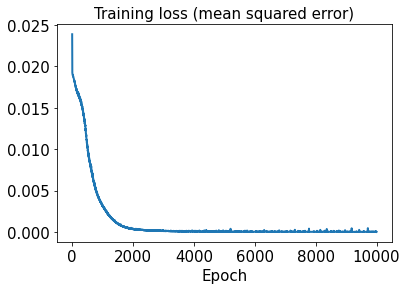

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

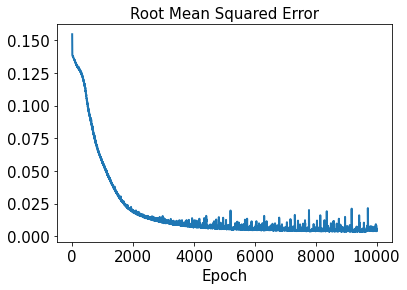

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0007072243


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.009739012


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

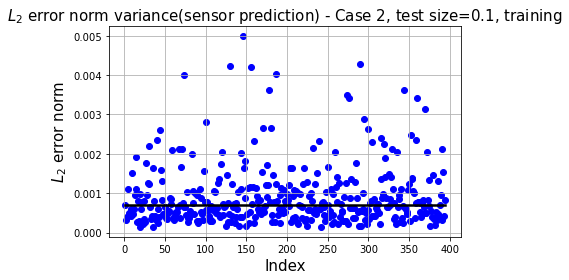

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

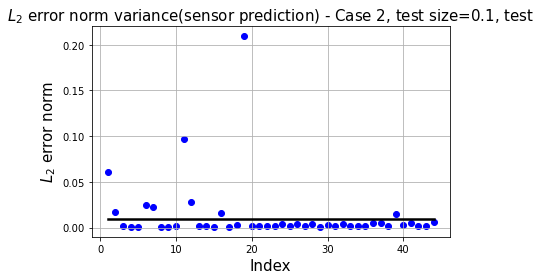

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
13/13 [==============================] - 1s 24ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 3/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 4/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0974
Epoch 5/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0888
Epoch 6/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0848
Epoch 7/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 8/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0829
Epoch 9/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 10/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 11/10000
13/13 [======

13/13 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 85/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 86/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 87/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 88/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 89/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 90/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0293
Epoch 91/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0291
Epoch 92/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8323e-04 - rmse: 0.0286
Epoch 93/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6572e-04 - rmse: 0.0283
Epoch 94/10000
13/13 [=====

13/13 [==============================] - 0s 5ms/step - loss: 3.8536e-04 - rmse: 0.0149
Epoch 165/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8213e-04 - rmse: 0.0148
Epoch 166/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7878e-04 - rmse: 0.0147
Epoch 167/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7463e-04 - rmse: 0.0146
Epoch 168/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7154e-04 - rmse: 0.0145
Epoch 169/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6826e-04 - rmse: 0.0144
Epoch 170/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6625e-04 - rmse: 0.0143
Epoch 171/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6500e-04 - rmse: 0.0143
Epoch 172/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5923e-04 - rmse: 0.0141
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5628e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 2.4402e-04 - rmse: 0.0094
Epoch 244/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4306e-04 - rmse: 0.0094
Epoch 245/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4218e-04 - rmse: 0.0093
Epoch 246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4125e-04 - rmse: 0.0093
Epoch 247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4009e-04 - rmse: 0.0092
Epoch 248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3858e-04 - rmse: 0.0092
Epoch 249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3763e-04 - rmse: 0.0091
Epoch 250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3696e-04 - rmse: 0.0091
Epoch 251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3606e-04 - rmse: 0.0090
Epoch 252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3575e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.9334e-04 - rmse: 0.0069
Epoch 323/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9302e-04 - rmse: 0.0069
Epoch 324/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9236e-04 - rmse: 0.0068
Epoch 325/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9146e-04 - rmse: 0.0068
Epoch 326/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9064e-04 - rmse: 0.0067
Epoch 327/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9016e-04 - rmse: 0.0067
Epoch 328/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9002e-04 - rmse: 0.0067
Epoch 329/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8987e-04 - rmse: 0.0067
Epoch 330/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8890e-04 - rmse: 0.0066
Epoch 331/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8856e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.6426e-04 - rmse: 0.0054
Epoch 402/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6380e-04 - rmse: 0.0053
Epoch 403/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6357e-04 - rmse: 0.0053
Epoch 404/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6405e-04 - rmse: 0.0054
Epoch 405/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6361e-04 - rmse: 0.0054
Epoch 406/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6315e-04 - rmse: 0.0053
Epoch 407/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6253e-04 - rmse: 0.0053
Epoch 408/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6243e-04 - rmse: 0.0053
Epoch 409/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6192e-04 - rmse: 0.0052
Epoch 410/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6149e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.4488e-04 - rmse: 0.0045
Epoch 481/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4497e-04 - rmse: 0.0045
Epoch 482/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4493e-04 - rmse: 0.0045
Epoch 483/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4475e-04 - rmse: 0.0045
Epoch 484/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4418e-04 - rmse: 0.0045
Epoch 485/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4392e-04 - rmse: 0.0045
Epoch 486/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4416e-04 - rmse: 0.0045
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4346e-04 - rmse: 0.0044
Epoch 488/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4316e-04 - rmse: 0.0044
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4308e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.2971e-04 - rmse: 0.0039
Epoch 560/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2978e-04 - rmse: 0.0039
Epoch 561/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2956e-04 - rmse: 0.0039
Epoch 562/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2931e-04 - rmse: 0.0039
Epoch 563/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2902e-04 - rmse: 0.0039
Epoch 564/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2896e-04 - rmse: 0.0039
Epoch 565/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2889e-04 - rmse: 0.0039
Epoch 566/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2867e-04 - rmse: 0.0039
Epoch 567/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2876e-04 - rmse: 0.0039
Epoch 568/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2845e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.1764e-04 - rmse: 0.0036
Epoch 639/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1727e-04 - rmse: 0.0035
Epoch 640/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1757e-04 - rmse: 0.0036
Epoch 641/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1716e-04 - rmse: 0.0036
Epoch 642/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1716e-04 - rmse: 0.0036
Epoch 643/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1745e-04 - rmse: 0.0036
Epoch 644/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1698e-04 - rmse: 0.0036
Epoch 645/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1703e-04 - rmse: 0.0036
Epoch 646/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.1681e-04 - rmse: 0.0036
Epoch 647/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1692e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.0730e-04 - rmse: 0.0033
Epoch 718/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.0703e-04 - rmse: 0.0033
Epoch 719/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0682e-04 - rmse: 0.0033
Epoch 720/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0671e-04 - rmse: 0.0033
Epoch 721/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0669e-04 - rmse: 0.0033
Epoch 722/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0648e-04 - rmse: 0.0033
Epoch 723/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0651e-04 - rmse: 0.0033
Epoch 724/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0664e-04 - rmse: 0.0033
Epoch 725/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0629e-04 - rmse: 0.0033
Epoch 726/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0640e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 9.8373e-05 - rmse: 0.0031
Epoch 797/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8252e-05 - rmse: 0.0031
Epoch 798/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7950e-05 - rmse: 0.0031
Epoch 799/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7836e-05 - rmse: 0.0031
Epoch 800/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7705e-05 - rmse: 0.0030
Epoch 801/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7679e-05 - rmse: 0.0031
Epoch 802/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7753e-05 - rmse: 0.0031
Epoch 803/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7549e-05 - rmse: 0.0031
Epoch 804/10000
13/13 [==============================] - 0s 6ms/step - loss: 9.7347e-05 - rmse: 0.0030
Epoch 805/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7301e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 9.0862e-05 - rmse: 0.0030
Epoch 876/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0462e-05 - rmse: 0.0029
Epoch 877/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0450e-05 - rmse: 0.0029
Epoch 878/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0274e-05 - rmse: 0.0029
Epoch 879/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0289e-05 - rmse: 0.0029
Epoch 880/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0689e-05 - rmse: 0.0030
Epoch 881/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0349e-05 - rmse: 0.0030
Epoch 882/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0161e-05 - rmse: 0.0029
Epoch 883/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.0016e-05 - rmse: 0.0029
Epoch 884/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.9712e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.4297e-05 - rmse: 0.0029
Epoch 955/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4459e-05 - rmse: 0.0029
Epoch 956/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4258e-05 - rmse: 0.0029
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4034e-05 - rmse: 0.0028
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3973e-05 - rmse: 0.0028
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3800e-05 - rmse: 0.0028
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3677e-05 - rmse: 0.0028
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3802e-05 - rmse: 0.0028
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3653e-05 - rmse: 0.0028
Epoch 963/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.3537e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 7.8166e-05 - rmse: 0.0027
Epoch 1034/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8128e-05 - rmse: 0.0027
Epoch 1035/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8075e-05 - rmse: 0.0027
Epoch 1036/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8127e-05 - rmse: 0.0027
Epoch 1037/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8068e-05 - rmse: 0.0027
Epoch 1038/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8188e-05 - rmse: 0.0027
Epoch 1039/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8123e-05 - rmse: 0.0027
Epoch 1040/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.7815e-05 - rmse: 0.0027
Epoch 1041/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.7683e-05 - rmse: 0.0027
Epoch 1042/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.7

13/13 [==============================] - 0s 5ms/step - loss: 7.3215e-05 - rmse: 0.0026
Epoch 1112/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3218e-05 - rmse: 0.0026
Epoch 1113/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3138e-05 - rmse: 0.0026
Epoch 1114/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.2959e-05 - rmse: 0.0026
Epoch 1115/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3235e-05 - rmse: 0.0026
Epoch 1116/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3101e-05 - rmse: 0.0026
Epoch 1117/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.2958e-05 - rmse: 0.0026
Epoch 1118/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3085e-05 - rmse: 0.0026
Epoch 1119/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.2838e-05 - rmse: 0.0026
Epoch 1120/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.2

13/13 [==============================] - 0s 5ms/step - loss: 6.8995e-05 - rmse: 0.0025
Epoch 1190/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8817e-05 - rmse: 0.0025
Epoch 1191/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8782e-05 - rmse: 0.0025
Epoch 1192/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8747e-05 - rmse: 0.0025
Epoch 1193/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8650e-05 - rmse: 0.0025
Epoch 1194/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8795e-05 - rmse: 0.0025
Epoch 1195/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8747e-05 - rmse: 0.0025
Epoch 1196/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8597e-05 - rmse: 0.0025
Epoch 1197/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8437e-05 - rmse: 0.0025
Epoch 1198/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.8

13/13 [==============================] - 0s 5ms/step - loss: 6.5318e-05 - rmse: 0.0025
Epoch 1268/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5123e-05 - rmse: 0.0025
Epoch 1269/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5175e-05 - rmse: 0.0025
Epoch 1270/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4864e-05 - rmse: 0.0024
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4728e-05 - rmse: 0.0024
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4849e-05 - rmse: 0.0025
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4751e-05 - rmse: 0.0024
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4818e-05 - rmse: 0.0025
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4585e-05 - rmse: 0.0024
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.4

13/13 [==============================] - 0s 5ms/step - loss: 6.1472e-05 - rmse: 0.0024
Epoch 1346/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1531e-05 - rmse: 0.0024
Epoch 1347/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1670e-05 - rmse: 0.0024
Epoch 1348/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1454e-05 - rmse: 0.0024
Epoch 1349/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1392e-05 - rmse: 0.0024
Epoch 1350/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1353e-05 - rmse: 0.0024
Epoch 1351/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1286e-05 - rmse: 0.0024
Epoch 1352/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1121e-05 - rmse: 0.0023
Epoch 1353/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1213e-05 - rmse: 0.0024
Epoch 1354/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1

13/13 [==============================] - 0s 5ms/step - loss: 5.8606e-05 - rmse: 0.0024
Epoch 1424/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8480e-05 - rmse: 0.0023
Epoch 1425/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8543e-05 - rmse: 0.0024
Epoch 1426/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8776e-05 - rmse: 0.0024
Epoch 1427/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8481e-05 - rmse: 0.0024
Epoch 1428/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8440e-05 - rmse: 0.0024
Epoch 1429/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8428e-05 - rmse: 0.0024
Epoch 1430/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8556e-05 - rmse: 0.0024
Epoch 1431/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8485e-05 - rmse: 0.0024
Epoch 1432/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8

13/13 [==============================] - 0s 5ms/step - loss: 5.5631e-05 - rmse: 0.0023
Epoch 1502/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5593e-05 - rmse: 0.0023
Epoch 1503/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5554e-05 - rmse: 0.0023
Epoch 1504/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5449e-05 - rmse: 0.0022
Epoch 1505/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5795e-05 - rmse: 0.0023
Epoch 1506/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5593e-05 - rmse: 0.0023
Epoch 1507/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5467e-05 - rmse: 0.0023
Epoch 1508/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5703e-05 - rmse: 0.0023
Epoch 1509/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5515e-05 - rmse: 0.0023
Epoch 1510/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5

13/13 [==============================] - 0s 5ms/step - loss: 5.3196e-05 - rmse: 0.0022
Epoch 1580/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3244e-05 - rmse: 0.0022
Epoch 1581/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3112e-05 - rmse: 0.0022
Epoch 1582/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3083e-05 - rmse: 0.0022
Epoch 1583/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3367e-05 - rmse: 0.0023
Epoch 1584/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3279e-05 - rmse: 0.0023
Epoch 1585/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3059e-05 - rmse: 0.0022
Epoch 1586/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2995e-05 - rmse: 0.0022
Epoch 1587/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2848e-05 - rmse: 0.0022
Epoch 1588/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2

13/13 [==============================] - 0s 5ms/step - loss: 5.1286e-05 - rmse: 0.0022
Epoch 1658/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0853e-05 - rmse: 0.0021
Epoch 1659/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0897e-05 - rmse: 0.0022
Epoch 1660/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0965e-05 - rmse: 0.0022
Epoch 1661/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0804e-05 - rmse: 0.0021
Epoch 1662/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0962e-05 - rmse: 0.0022
Epoch 1663/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0923e-05 - rmse: 0.0022
Epoch 1664/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0745e-05 - rmse: 0.0022
Epoch 1665/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0716e-05 - rmse: 0.0022
Epoch 1666/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0

13/13 [==============================] - 0s 5ms/step - loss: 4.9475e-05 - rmse: 0.0022
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9480e-05 - rmse: 0.0022
Epoch 1737/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9148e-05 - rmse: 0.0022
Epoch 1738/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9041e-05 - rmse: 0.0021
Epoch 1739/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8986e-05 - rmse: 0.0021
Epoch 1740/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8791e-05 - rmse: 0.0021
Epoch 1741/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8775e-05 - rmse: 0.0021
Epoch 1742/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8645e-05 - rmse: 0.0021
Epoch 1743/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8775e-05 - rmse: 0.0021
Epoch 1744/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8

13/13 [==============================] - 0s 5ms/step - loss: 4.7159e-05 - rmse: 0.0021
Epoch 1814/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7033e-05 - rmse: 0.0021
Epoch 1815/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7163e-05 - rmse: 0.0021
Epoch 1816/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7709e-05 - rmse: 0.0022
Epoch 1817/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7491e-05 - rmse: 0.0022
Epoch 1818/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7352e-05 - rmse: 0.0021
Epoch 1819/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7226e-05 - rmse: 0.0021
Epoch 1820/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7132e-05 - rmse: 0.0021
Epoch 1821/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7015e-05 - rmse: 0.0021
Epoch 1822/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7

13/13 [==============================] - 0s 5ms/step - loss: 4.5601e-05 - rmse: 0.0021
Epoch 1892/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5699e-05 - rmse: 0.0021
Epoch 1893/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5512e-05 - rmse: 0.0020
Epoch 1894/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5427e-05 - rmse: 0.0020
Epoch 1895/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5403e-05 - rmse: 0.0020
Epoch 1896/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5512e-05 - rmse: 0.0021
Epoch 1897/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5296e-05 - rmse: 0.0020
Epoch 1898/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5375e-05 - rmse: 0.0020
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5342e-05 - rmse: 0.0020
Epoch 1900/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5

13/13 [==============================] - 0s 5ms/step - loss: 4.4160e-05 - rmse: 0.0020
Epoch 1970/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4002e-05 - rmse: 0.0020
Epoch 1971/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3935e-05 - rmse: 0.0020
Epoch 1972/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4123e-05 - rmse: 0.0020
Epoch 1973/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4151e-05 - rmse: 0.0021
Epoch 1974/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3973e-05 - rmse: 0.0020
Epoch 1975/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4075e-05 - rmse: 0.0020
Epoch 1976/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4093e-05 - rmse: 0.0020
Epoch 1977/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4194e-05 - rmse: 0.0021
Epoch 1978/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4

13/13 [==============================] - 0s 5ms/step - loss: 4.3145e-05 - rmse: 0.0021
Epoch 2048/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3233e-05 - rmse: 0.0021
Epoch 2049/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3332e-05 - rmse: 0.0021
Epoch 2050/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3288e-05 - rmse: 0.0021
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3238e-05 - rmse: 0.0021
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3054e-05 - rmse: 0.0021
Epoch 2053/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3116e-05 - rmse: 0.0021
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3019e-05 - rmse: 0.0021
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2966e-05 - rmse: 0.0021
Epoch 2056/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3

13/13 [==============================] - 0s 5ms/step - loss: 4.1796e-05 - rmse: 0.0020
Epoch 2126/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1547e-05 - rmse: 0.0020
Epoch 2127/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1726e-05 - rmse: 0.0020
Epoch 2128/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1661e-05 - rmse: 0.0020
Epoch 2129/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1437e-05 - rmse: 0.0020
Epoch 2130/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1476e-05 - rmse: 0.0020
Epoch 2131/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1478e-05 - rmse: 0.0020
Epoch 2132/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1368e-05 - rmse: 0.0020
Epoch 2133/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1367e-05 - rmse: 0.0020
Epoch 2134/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1

13/13 [==============================] - 0s 6ms/step - loss: 4.0418e-05 - rmse: 0.0019
Epoch 2204/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0353e-05 - rmse: 0.0019
Epoch 2205/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0362e-05 - rmse: 0.0019
Epoch 2206/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0467e-05 - rmse: 0.0020
Epoch 2207/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0730e-05 - rmse: 0.0020
Epoch 2208/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0883e-05 - rmse: 0.0021
Epoch 2209/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0570e-05 - rmse: 0.0020
Epoch 2210/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0296e-05 - rmse: 0.0019
Epoch 2211/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0130e-05 - rmse: 0.0019
Epoch 2212/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0

13/13 [==============================] - 0s 5ms/step - loss: 3.9445e-05 - rmse: 0.0019
Epoch 2282/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9588e-05 - rmse: 0.0020
Epoch 2283/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9619e-05 - rmse: 0.0020
Epoch 2284/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9522e-05 - rmse: 0.0020
Epoch 2285/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9347e-05 - rmse: 0.0019
Epoch 2286/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9215e-05 - rmse: 0.0019
Epoch 2287/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9177e-05 - rmse: 0.0019
Epoch 2288/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9151e-05 - rmse: 0.0019
Epoch 2289/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9116e-05 - rmse: 0.0019
Epoch 2290/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9

13/13 [==============================] - 0s 5ms/step - loss: 3.8595e-05 - rmse: 0.0019
Epoch 2360/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8723e-05 - rmse: 0.0020
Epoch 2361/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8882e-05 - rmse: 0.0020
Epoch 2362/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8951e-05 - rmse: 0.0020
Epoch 2363/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8757e-05 - rmse: 0.0020
Epoch 2364/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8587e-05 - rmse: 0.0020
Epoch 2365/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8490e-05 - rmse: 0.0019
Epoch 2366/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8628e-05 - rmse: 0.0020
Epoch 2367/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8611e-05 - rmse: 0.0020
Epoch 2368/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8

13/13 [==============================] - 0s 5ms/step - loss: 3.7584e-05 - rmse: 0.0019
Epoch 2438/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7663e-05 - rmse: 0.0019
Epoch 2439/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7405e-05 - rmse: 0.0018
Epoch 2440/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7442e-05 - rmse: 0.0019
Epoch 2441/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7597e-05 - rmse: 0.0019
Epoch 2442/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7491e-05 - rmse: 0.0019
Epoch 2443/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7645e-05 - rmse: 0.0019
Epoch 2444/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7504e-05 - rmse: 0.0019
Epoch 2445/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7408e-05 - rmse: 0.0019
Epoch 2446/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7

13/13 [==============================] - 0s 5ms/step - loss: 3.7010e-05 - rmse: 0.0019
Epoch 2516/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7574e-05 - rmse: 0.0021
Epoch 2517/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6854e-05 - rmse: 0.0019
Epoch 2518/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6625e-05 - rmse: 0.0018
Epoch 2519/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6520e-05 - rmse: 0.0018
Epoch 2520/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6504e-05 - rmse: 0.0018
Epoch 2521/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6495e-05 - rmse: 0.0018
Epoch 2522/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6437e-05 - rmse: 0.0018
Epoch 2523/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6419e-05 - rmse: 0.0018
Epoch 2524/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.6097e-05 - rmse: 0.0019
Epoch 2594/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6021e-05 - rmse: 0.0018
Epoch 2595/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6026e-05 - rmse: 0.0019
Epoch 2596/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5991e-05 - rmse: 0.0018
Epoch 2597/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6024e-05 - rmse: 0.0019
Epoch 2598/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6123e-05 - rmse: 0.0019
Epoch 2599/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5914e-05 - rmse: 0.0018
Epoch 2600/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5909e-05 - rmse: 0.0018
Epoch 2601/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5912e-05 - rmse: 0.0018
Epoch 2602/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.5681e-05 - rmse: 0.0019
Epoch 2672/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5416e-05 - rmse: 0.0019
Epoch 2673/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5243e-05 - rmse: 0.0018
Epoch 2674/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5236e-05 - rmse: 0.0018
Epoch 2675/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5108e-05 - rmse: 0.0018
Epoch 2676/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5081e-05 - rmse: 0.0018
Epoch 2677/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5105e-05 - rmse: 0.0018
Epoch 2678/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5441e-05 - rmse: 0.0019
Epoch 2679/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5904e-05 - rmse: 0.0020
Epoch 2680/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5

13/13 [==============================] - 0s 5ms/step - loss: 3.4663e-05 - rmse: 0.0018
Epoch 2750/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4608e-05 - rmse: 0.0018
Epoch 2751/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4509e-05 - rmse: 0.0018
Epoch 2752/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4539e-05 - rmse: 0.0018
Epoch 2753/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4783e-05 - rmse: 0.0019
Epoch 2754/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5309e-05 - rmse: 0.0020
Epoch 2755/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5242e-05 - rmse: 0.0020
Epoch 2756/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5138e-05 - rmse: 0.0019
Epoch 2757/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4754e-05 - rmse: 0.0018
Epoch 2758/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.4031e-05 - rmse: 0.0018
Epoch 2828/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4102e-05 - rmse: 0.0018
Epoch 2829/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4085e-05 - rmse: 0.0018
Epoch 2830/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3916e-05 - rmse: 0.0018
Epoch 2831/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3877e-05 - rmse: 0.0017
Epoch 2832/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3851e-05 - rmse: 0.0017
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3825e-05 - rmse: 0.0017
Epoch 2834/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4022e-05 - rmse: 0.0018
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4021e-05 - rmse: 0.0018
Epoch 2836/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.3379e-05 - rmse: 0.0017
Epoch 2906/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3386e-05 - rmse: 0.0018
Epoch 2907/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3629e-05 - rmse: 0.0018
Epoch 2908/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3457e-05 - rmse: 0.0018
Epoch 2909/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3481e-05 - rmse: 0.0018
Epoch 2910/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3492e-05 - rmse: 0.0018
Epoch 2911/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3353e-05 - rmse: 0.0017
Epoch 2912/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3281e-05 - rmse: 0.0017
Epoch 2913/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3393e-05 - rmse: 0.0018
Epoch 2914/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.3127e-05 - rmse: 0.0018
Epoch 2984/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3041e-05 - rmse: 0.0018
Epoch 2985/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3100e-05 - rmse: 0.0018
Epoch 2986/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3298e-05 - rmse: 0.0019
Epoch 2987/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3149e-05 - rmse: 0.0018
Epoch 2988/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3073e-05 - rmse: 0.0018
Epoch 2989/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3001e-05 - rmse: 0.0018
Epoch 2990/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3263e-05 - rmse: 0.0019
Epoch 2991/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3132e-05 - rmse: 0.0018
Epoch 2992/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2633e-05 - rmse: 0.0018
Epoch 3062/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2443e-05 - rmse: 0.0017
Epoch 3063/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2420e-05 - rmse: 0.0017
Epoch 3064/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2503e-05 - rmse: 0.0018
Epoch 3065/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2368e-05 - rmse: 0.0017
Epoch 3066/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2743e-05 - rmse: 0.0018
Epoch 3067/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2793e-05 - rmse: 0.0019
Epoch 3068/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2995e-05 - rmse: 0.0019
Epoch 3069/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2883e-05 - rmse: 0.0019
Epoch 3070/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.1956e-05 - rmse: 0.0017
Epoch 3140/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1948e-05 - rmse: 0.0017
Epoch 3141/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1809e-05 - rmse: 0.0017
Epoch 3142/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1763e-05 - rmse: 0.0017
Epoch 3143/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1780e-05 - rmse: 0.0017
Epoch 3144/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1845e-05 - rmse: 0.0017
Epoch 3145/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1896e-05 - rmse: 0.0017
Epoch 3146/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2283e-05 - rmse: 0.0018
Epoch 3147/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2093e-05 - rmse: 0.0018
Epoch 3148/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.1416e-05 - rmse: 0.0017
Epoch 3218/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1414e-05 - rmse: 0.0017
Epoch 3219/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1551e-05 - rmse: 0.0017
Epoch 3220/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1509e-05 - rmse: 0.0017
Epoch 3221/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1540e-05 - rmse: 0.0017
Epoch 3222/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1912e-05 - rmse: 0.0018
Epoch 3223/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1736e-05 - rmse: 0.0018
Epoch 3224/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1598e-05 - rmse: 0.0017
Epoch 3225/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1535e-05 - rmse: 0.0017
Epoch 3226/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1058e-05 - rmse: 0.0017
Epoch 3296/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1220e-05 - rmse: 0.0017
Epoch 3297/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1274e-05 - rmse: 0.0018
Epoch 3298/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1013e-05 - rmse: 0.0017
Epoch 3299/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1009e-05 - rmse: 0.0017
Epoch 3300/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1030e-05 - rmse: 0.0017
Epoch 3301/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1077e-05 - rmse: 0.0017
Epoch 3302/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0931e-05 - rmse: 0.0017
Epoch 3303/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1268e-05 - rmse: 0.0018
Epoch 3304/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.0613e-05 - rmse: 0.0017
Epoch 3374/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0596e-05 - rmse: 0.0017
Epoch 3375/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0597e-05 - rmse: 0.0017
Epoch 3376/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0740e-05 - rmse: 0.0017
Epoch 3377/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0725e-05 - rmse: 0.0017
Epoch 3378/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0786e-05 - rmse: 0.0017
Epoch 3379/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0838e-05 - rmse: 0.0017
Epoch 3380/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0844e-05 - rmse: 0.0017
Epoch 3381/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0915e-05 - rmse: 0.0018
Epoch 3382/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.0334e-05 - rmse: 0.0017
Epoch 3452/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0427e-05 - rmse: 0.0017
Epoch 3453/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0184e-05 - rmse: 0.0016
Epoch 3454/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0092e-05 - rmse: 0.0016
Epoch 3455/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0076e-05 - rmse: 0.0016
Epoch 3456/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0228e-05 - rmse: 0.0017
Epoch 3457/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0238e-05 - rmse: 0.0017
Epoch 3458/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0428e-05 - rmse: 0.0017
Epoch 3459/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0396e-05 - rmse: 0.0017
Epoch 3460/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 3.0086e-05 - rmse: 0.0017
Epoch 3530/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0082e-05 - rmse: 0.0017
Epoch 3531/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0031e-05 - rmse: 0.0017
Epoch 3532/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9990e-05 - rmse: 0.0017
Epoch 3533/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9940e-05 - rmse: 0.0017
Epoch 3534/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9998e-05 - rmse: 0.0017
Epoch 3535/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0129e-05 - rmse: 0.0017
Epoch 3536/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0105e-05 - rmse: 0.0017
Epoch 3537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9861e-05 - rmse: 0.0016
Epoch 3538/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9676e-05 - rmse: 0.0017
Epoch 3608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9767e-05 - rmse: 0.0017
Epoch 3609/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9744e-05 - rmse: 0.0017
Epoch 3610/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9733e-05 - rmse: 0.0017
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9642e-05 - rmse: 0.0017
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9688e-05 - rmse: 0.0017
Epoch 3613/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9537e-05 - rmse: 0.0016
Epoch 3614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9490e-05 - rmse: 0.0016
Epoch 3615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9512e-05 - rmse: 0.0016
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9439e-05 - rmse: 0.0017
Epoch 3686/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.9507e-05 - rmse: 0.0017
Epoch 3687/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9355e-05 - rmse: 0.0017
Epoch 3688/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9656e-05 - rmse: 0.0017
Epoch 3689/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9474e-05 - rmse: 0.0017
Epoch 3690/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9469e-05 - rmse: 0.0017
Epoch 3691/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9485e-05 - rmse: 0.0017
Epoch 3692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9318e-05 - rmse: 0.0017
Epoch 3693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9261e-05 - rmse: 0.0016
Epoch 3694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8881e-05 - rmse: 0.0016
Epoch 3764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9078e-05 - rmse: 0.0017
Epoch 3765/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9253e-05 - rmse: 0.0017
Epoch 3766/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9243e-05 - rmse: 0.0017
Epoch 3767/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9294e-05 - rmse: 0.0017
Epoch 3768/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9428e-05 - rmse: 0.0018
Epoch 3769/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9611e-05 - rmse: 0.0018
Epoch 3770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9491e-05 - rmse: 0.0018
Epoch 3771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9403e-05 - rmse: 0.0018
Epoch 3772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8671e-05 - rmse: 0.0016
Epoch 3842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8554e-05 - rmse: 0.0016
Epoch 3843/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8587e-05 - rmse: 0.0016
Epoch 3844/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8603e-05 - rmse: 0.0016
Epoch 3845/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8605e-05 - rmse: 0.0016
Epoch 3846/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8631e-05 - rmse: 0.0016
Epoch 3847/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8588e-05 - rmse: 0.0016
Epoch 3848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8580e-05 - rmse: 0.0016
Epoch 3849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8749e-05 - rmse: 0.0016
Epoch 3850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8258e-05 - rmse: 0.0016
Epoch 3920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8241e-05 - rmse: 0.0016
Epoch 3921/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8392e-05 - rmse: 0.0016
Epoch 3922/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8418e-05 - rmse: 0.0016
Epoch 3923/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8370e-05 - rmse: 0.0016
Epoch 3924/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8338e-05 - rmse: 0.0016
Epoch 3925/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8322e-05 - rmse: 0.0016
Epoch 3926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8284e-05 - rmse: 0.0016
Epoch 3927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8393e-05 - rmse: 0.0016
Epoch 3928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8284e-05 - rmse: 0.0016
Epoch 3998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8368e-05 - rmse: 0.0017
Epoch 3999/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8345e-05 - rmse: 0.0017
Epoch 4000/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8300e-05 - rmse: 0.0016
Epoch 4001/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8096e-05 - rmse: 0.0016
Epoch 4002/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8076e-05 - rmse: 0.0016
Epoch 4003/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8349e-05 - rmse: 0.0017
Epoch 4004/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8299e-05 - rmse: 0.0016
Epoch 4005/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8864e-05 - rmse: 0.0018
Epoch 4006/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.7982e-05 - rmse: 0.0016
Epoch 4076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8176e-05 - rmse: 0.0017
Epoch 4077/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8473e-05 - rmse: 0.0018
Epoch 4078/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8428e-05 - rmse: 0.0017
Epoch 4079/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8596e-05 - rmse: 0.0018
Epoch 4080/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8186e-05 - rmse: 0.0017
Epoch 4081/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8163e-05 - rmse: 0.0017
Epoch 4082/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8175e-05 - rmse: 0.0017
Epoch 4083/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8171e-05 - rmse: 0.0017
Epoch 4084/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8116e-05 - rmse: 0.0017
Epoch 4154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8018e-05 - rmse: 0.0017
Epoch 4155/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8195e-05 - rmse: 0.0017
Epoch 4156/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8102e-05 - rmse: 0.0017
Epoch 4157/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8164e-05 - rmse: 0.0017
Epoch 4158/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8166e-05 - rmse: 0.0017
Epoch 4159/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8020e-05 - rmse: 0.0017
Epoch 4160/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7935e-05 - rmse: 0.0017
Epoch 4161/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7965e-05 - rmse: 0.0017
Epoch 4162/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7525e-05 - rmse: 0.0016
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7439e-05 - rmse: 0.0016
Epoch 4233/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7307e-05 - rmse: 0.0015
Epoch 4234/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7332e-05 - rmse: 0.0015
Epoch 4235/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7226e-05 - rmse: 0.0015
Epoch 4236/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7277e-05 - rmse: 0.0015
Epoch 4237/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7651e-05 - rmse: 0.0016
Epoch 4238/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7506e-05 - rmse: 0.0016
Epoch 4239/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7699e-05 - rmse: 0.0017
Epoch 4240/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7236e-05 - rmse: 0.0016
Epoch 4310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7200e-05 - rmse: 0.0016
Epoch 4311/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7198e-05 - rmse: 0.0016
Epoch 4312/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7241e-05 - rmse: 0.0016
Epoch 4313/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7691e-05 - rmse: 0.0017
Epoch 4314/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7726e-05 - rmse: 0.0017
Epoch 4315/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7820e-05 - rmse: 0.0018
Epoch 4316/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7528e-05 - rmse: 0.0017
Epoch 4317/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7465e-05 - rmse: 0.0016
Epoch 4318/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7325e-05 - rmse: 0.0017
Epoch 4388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7180e-05 - rmse: 0.0016
Epoch 4389/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7192e-05 - rmse: 0.0016
Epoch 4390/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7319e-05 - rmse: 0.0017
Epoch 4391/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8048e-05 - rmse: 0.0019
Epoch 4392/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7364e-05 - rmse: 0.0017
Epoch 4393/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7148e-05 - rmse: 0.0016
Epoch 4394/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6920e-05 - rmse: 0.0015
Epoch 4395/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6834e-05 - rmse: 0.0015
Epoch 4396/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.8290e-05 - rmse: 0.0020
Epoch 4466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7723e-05 - rmse: 0.0018
Epoch 4467/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7263e-05 - rmse: 0.0017
Epoch 4468/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7319e-05 - rmse: 0.0017
Epoch 4469/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7676e-05 - rmse: 0.0018
Epoch 4470/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7522e-05 - rmse: 0.0018
Epoch 4471/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7956e-05 - rmse: 0.0019
Epoch 4472/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7529e-05 - rmse: 0.0018
Epoch 4473/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7253e-05 - rmse: 0.0017
Epoch 4474/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.6874e-05 - rmse: 0.0016
Epoch 4544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6516e-05 - rmse: 0.0015
Epoch 4545/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6409e-05 - rmse: 0.0015
Epoch 4546/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6499e-05 - rmse: 0.0015
Epoch 4547/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6480e-05 - rmse: 0.0015
Epoch 4548/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6527e-05 - rmse: 0.0015
Epoch 4549/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6504e-05 - rmse: 0.0015
Epoch 4550/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6501e-05 - rmse: 0.0015
Epoch 4551/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6560e-05 - rmse: 0.0015
Epoch 4552/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6400e-05 - rmse: 0.0015
Epoch 4622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6486e-05 - rmse: 0.0016
Epoch 4623/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6720e-05 - rmse: 0.0016
Epoch 4624/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6897e-05 - rmse: 0.0017
Epoch 4625/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6637e-05 - rmse: 0.0016
Epoch 4626/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6484e-05 - rmse: 0.0016
Epoch 4627/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6724e-05 - rmse: 0.0016
Epoch 4628/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6918e-05 - rmse: 0.0017
Epoch 4629/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6632e-05 - rmse: 0.0016
Epoch 4630/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6817e-05 - rmse: 0.0017
Epoch 4700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6461e-05 - rmse: 0.0016
Epoch 4701/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6400e-05 - rmse: 0.0016
Epoch 4702/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6398e-05 - rmse: 0.0016
Epoch 4703/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6392e-05 - rmse: 0.0016
Epoch 4704/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6394e-05 - rmse: 0.0016
Epoch 4705/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6258e-05 - rmse: 0.0015
Epoch 4706/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6214e-05 - rmse: 0.0015
Epoch 4707/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6233e-05 - rmse: 0.0015
Epoch 4708/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6118e-05 - rmse: 0.0015
Epoch 4778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6415e-05 - rmse: 0.0016
Epoch 4779/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6674e-05 - rmse: 0.0017
Epoch 4780/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6761e-05 - rmse: 0.0017
Epoch 4781/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6458e-05 - rmse: 0.0016
Epoch 4782/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6276e-05 - rmse: 0.0016
Epoch 4783/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6214e-05 - rmse: 0.0016
Epoch 4784/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6105e-05 - rmse: 0.0015
Epoch 4785/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6099e-05 - rmse: 0.0015
Epoch 4786/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 6ms/step - loss: 2.5751e-05 - rmse: 0.0015
Epoch 4856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5736e-05 - rmse: 0.0015
Epoch 4857/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5837e-05 - rmse: 0.0015
Epoch 4858/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5936e-05 - rmse: 0.0015
Epoch 4859/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5774e-05 - rmse: 0.0015
Epoch 4860/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5776e-05 - rmse: 0.0015
Epoch 4861/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5962e-05 - rmse: 0.0015
Epoch 4862/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5958e-05 - rmse: 0.0015
Epoch 4863/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5918e-05 - rmse: 0.0015
Epoch 4864/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5845e-05 - rmse: 0.0015
Epoch 4934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5986e-05 - rmse: 0.0016
Epoch 4935/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6248e-05 - rmse: 0.0017
Epoch 4936/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6086e-05 - rmse: 0.0016
Epoch 4937/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5820e-05 - rmse: 0.0015
Epoch 4938/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5620e-05 - rmse: 0.0015
Epoch 4939/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5695e-05 - rmse: 0.0015
Epoch 4940/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6013e-05 - rmse: 0.0016
Epoch 4941/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6429e-05 - rmse: 0.0017
Epoch 4942/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.5994e-05 - rmse: 0.0016
Epoch 5012/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5767e-05 - rmse: 0.0016
Epoch 5013/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5694e-05 - rmse: 0.0015
Epoch 5014/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5508e-05 - rmse: 0.0015
Epoch 5015/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5515e-05 - rmse: 0.0015
Epoch 5016/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5507e-05 - rmse: 0.0015
Epoch 5017/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5509e-05 - rmse: 0.0015
Epoch 5018/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5795e-05 - rmse: 0.0016
Epoch 5019/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5690e-05 - rmse: 0.0015
Epoch 5020/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5420e-05 - rmse: 0.0015
Epoch 5090/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5461e-05 - rmse: 0.0015
Epoch 5091/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5460e-05 - rmse: 0.0015
Epoch 5092/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5319e-05 - rmse: 0.0015
Epoch 5093/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5390e-05 - rmse: 0.0015
Epoch 5094/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5454e-05 - rmse: 0.0015
Epoch 5095/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5431e-05 - rmse: 0.0015
Epoch 5096/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5389e-05 - rmse: 0.0015
Epoch 5097/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5330e-05 - rmse: 0.0015
Epoch 5098/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5319e-05 - rmse: 0.0015
Epoch 5168/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5415e-05 - rmse: 0.0015
Epoch 5169/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5341e-05 - rmse: 0.0015
Epoch 5170/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5260e-05 - rmse: 0.0015
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5334e-05 - rmse: 0.0015
Epoch 5172/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5439e-05 - rmse: 0.0015
Epoch 5173/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5405e-05 - rmse: 0.0015
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5380e-05 - rmse: 0.0015
Epoch 5175/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5291e-05 - rmse: 0.0015
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5251e-05 - rmse: 0.0015
Epoch 5246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5279e-05 - rmse: 0.0015
Epoch 5247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5236e-05 - rmse: 0.0015
Epoch 5248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5271e-05 - rmse: 0.0015
Epoch 5249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5357e-05 - rmse: 0.0016
Epoch 5250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5260e-05 - rmse: 0.0015
Epoch 5251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5251e-05 - rmse: 0.0015
Epoch 5252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5027e-05 - rmse: 0.0015
Epoch 5253/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5000e-05 - rmse: 0.0014
Epoch 5254/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.5126e-05 - rmse: 0.0015
Epoch 5324/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5323e-05 - rmse: 0.0016
Epoch 5325/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5857e-05 - rmse: 0.0018
Epoch 5326/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5822e-05 - rmse: 0.0017
Epoch 5327/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5709e-05 - rmse: 0.0017
Epoch 5328/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5263e-05 - rmse: 0.0016
Epoch 5329/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5046e-05 - rmse: 0.0015
Epoch 5330/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5124e-05 - rmse: 0.0015
Epoch 5331/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5015e-05 - rmse: 0.0015
Epoch 5332/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4897e-05 - rmse: 0.0015
Epoch 5402/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4814e-05 - rmse: 0.0015
Epoch 5403/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4860e-05 - rmse: 0.0015
Epoch 5404/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4876e-05 - rmse: 0.0015
Epoch 5405/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4778e-05 - rmse: 0.0015
Epoch 5406/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4818e-05 - rmse: 0.0015
Epoch 5407/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4831e-05 - rmse: 0.0015
Epoch 5408/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4669e-05 - rmse: 0.0014
Epoch 5409/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4638e-05 - rmse: 0.0014
Epoch 5410/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.5627e-05 - rmse: 0.0018
Epoch 5480/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5260e-05 - rmse: 0.0016
Epoch 5481/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4985e-05 - rmse: 0.0016
Epoch 5482/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4760e-05 - rmse: 0.0015
Epoch 5483/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4934e-05 - rmse: 0.0015
Epoch 5484/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4859e-05 - rmse: 0.0015
Epoch 5485/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4700e-05 - rmse: 0.0015
Epoch 5486/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4743e-05 - rmse: 0.0015
Epoch 5487/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4602e-05 - rmse: 0.0014
Epoch 5488/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.5269e-05 - rmse: 0.0017
Epoch 5558/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5234e-05 - rmse: 0.0017
Epoch 5559/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5106e-05 - rmse: 0.0016
Epoch 5560/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4948e-05 - rmse: 0.0016
Epoch 5561/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5170e-05 - rmse: 0.0017
Epoch 5562/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4823e-05 - rmse: 0.0015
Epoch 5563/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4885e-05 - rmse: 0.0016
Epoch 5564/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4711e-05 - rmse: 0.0015
Epoch 5565/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4610e-05 - rmse: 0.0015
Epoch 5566/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.4944e-05 - rmse: 0.0016
Epoch 5636/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4695e-05 - rmse: 0.0015
Epoch 5637/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4651e-05 - rmse: 0.0015
Epoch 5638/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4596e-05 - rmse: 0.0015
Epoch 5639/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4411e-05 - rmse: 0.0014
Epoch 5640/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4545e-05 - rmse: 0.0015
Epoch 5641/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4425e-05 - rmse: 0.0014
Epoch 5642/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4636e-05 - rmse: 0.0015
Epoch 5643/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4744e-05 - rmse: 0.0016
Epoch 5644/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4611e-05 - rmse: 0.0015
Epoch 5714/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4430e-05 - rmse: 0.0015
Epoch 5715/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4312e-05 - rmse: 0.0014
Epoch 5716/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4225e-05 - rmse: 0.0014
Epoch 5717/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4246e-05 - rmse: 0.0014
Epoch 5718/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4569e-05 - rmse: 0.0015
Epoch 5719/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4460e-05 - rmse: 0.0015
Epoch 5720/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4270e-05 - rmse: 0.0014
Epoch 5721/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4247e-05 - rmse: 0.0014
Epoch 5722/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4349e-05 - rmse: 0.0015
Epoch 5792/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4226e-05 - rmse: 0.0014
Epoch 5793/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4269e-05 - rmse: 0.0015
Epoch 5794/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4174e-05 - rmse: 0.0014
Epoch 5795/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4073e-05 - rmse: 0.0014
Epoch 5796/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4083e-05 - rmse: 0.0014
Epoch 5797/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4102e-05 - rmse: 0.0014
Epoch 5798/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4053e-05 - rmse: 0.0014
Epoch 5799/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4058e-05 - rmse: 0.0014
Epoch 5800/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4239e-05 - rmse: 0.0015
Epoch 5870/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4101e-05 - rmse: 0.0014
Epoch 5871/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4124e-05 - rmse: 0.0014
Epoch 5872/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4352e-05 - rmse: 0.0015
Epoch 5873/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4175e-05 - rmse: 0.0015
Epoch 5874/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4168e-05 - rmse: 0.0015
Epoch 5875/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4114e-05 - rmse: 0.0014
Epoch 5876/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4080e-05 - rmse: 0.0014
Epoch 5877/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4028e-05 - rmse: 0.0014
Epoch 5878/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4054e-05 - rmse: 0.0015
Epoch 5948/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4010e-05 - rmse: 0.0014
Epoch 5949/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4076e-05 - rmse: 0.0015
Epoch 5950/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3956e-05 - rmse: 0.0014
Epoch 5951/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4087e-05 - rmse: 0.0015
Epoch 5952/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4096e-05 - rmse: 0.0015
Epoch 5953/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4248e-05 - rmse: 0.0015
Epoch 5954/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4320e-05 - rmse: 0.0015
Epoch 5955/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4809e-05 - rmse: 0.0017
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4012e-05 - rmse: 0.0015
Epoch 6026/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4002e-05 - rmse: 0.0015
Epoch 6027/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3970e-05 - rmse: 0.0015
Epoch 6028/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3811e-05 - rmse: 0.0014
Epoch 6029/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4059e-05 - rmse: 0.0015
Epoch 6030/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4084e-05 - rmse: 0.0015
Epoch 6031/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4219e-05 - rmse: 0.0015
Epoch 6032/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4232e-05 - rmse: 0.0016
Epoch 6033/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4117e-05 - rmse: 0.0015
Epoch 6034/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4066e-05 - rmse: 0.0015
Epoch 6104/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4136e-05 - rmse: 0.0015
Epoch 6105/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4215e-05 - rmse: 0.0016
Epoch 6106/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4194e-05 - rmse: 0.0016
Epoch 6107/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4051e-05 - rmse: 0.0015
Epoch 6108/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4318e-05 - rmse: 0.0016
Epoch 6109/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4161e-05 - rmse: 0.0016
Epoch 6110/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3931e-05 - rmse: 0.0015
Epoch 6111/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3846e-05 - rmse: 0.0015
Epoch 6112/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4014e-05 - rmse: 0.0015
Epoch 6182/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3869e-05 - rmse: 0.0015
Epoch 6183/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3988e-05 - rmse: 0.0015
Epoch 6184/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3832e-05 - rmse: 0.0015
Epoch 6185/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3882e-05 - rmse: 0.0015
Epoch 6186/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3800e-05 - rmse: 0.0015
Epoch 6187/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3628e-05 - rmse: 0.0014
Epoch 6188/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3554e-05 - rmse: 0.0014
Epoch 6189/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3574e-05 - rmse: 0.0014
Epoch 6190/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4239e-05 - rmse: 0.0016
Epoch 6260/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4041e-05 - rmse: 0.0016
Epoch 6261/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3884e-05 - rmse: 0.0015
Epoch 6262/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3654e-05 - rmse: 0.0014
Epoch 6263/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3640e-05 - rmse: 0.0014
Epoch 6264/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3641e-05 - rmse: 0.0014
Epoch 6265/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3876e-05 - rmse: 0.0015
Epoch 6266/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4014e-05 - rmse: 0.0016
Epoch 6267/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3809e-05 - rmse: 0.0015
Epoch 6268/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4062e-05 - rmse: 0.0016
Epoch 6338/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3626e-05 - rmse: 0.0015
Epoch 6339/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3546e-05 - rmse: 0.0014
Epoch 6340/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3462e-05 - rmse: 0.0014
Epoch 6341/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3542e-05 - rmse: 0.0014
Epoch 6342/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3807e-05 - rmse: 0.0015
Epoch 6343/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.3518e-05 - rmse: 0.0014
Epoch 6344/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3898e-05 - rmse: 0.0016
Epoch 6345/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3827e-05 - rmse: 0.0015
Epoch 6346/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3683e-05 - rmse: 0.0015
Epoch 6416/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3334e-05 - rmse: 0.0014
Epoch 6417/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3314e-05 - rmse: 0.0014
Epoch 6418/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3301e-05 - rmse: 0.0014
Epoch 6419/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3270e-05 - rmse: 0.0014
Epoch 6420/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3198e-05 - rmse: 0.0013
Epoch 6421/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3293e-05 - rmse: 0.0014
Epoch 6422/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3304e-05 - rmse: 0.0014
Epoch 6423/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3290e-05 - rmse: 0.0014
Epoch 6424/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3473e-05 - rmse: 0.0015
Epoch 6494/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3728e-05 - rmse: 0.0016
Epoch 6495/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3342e-05 - rmse: 0.0014
Epoch 6496/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3173e-05 - rmse: 0.0014
Epoch 6497/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3104e-05 - rmse: 0.0013
Epoch 6498/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3134e-05 - rmse: 0.0014
Epoch 6499/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3225e-05 - rmse: 0.0014
Epoch 6500/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3453e-05 - rmse: 0.0015
Epoch 6501/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3559e-05 - rmse: 0.0015
Epoch 6502/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3424e-05 - rmse: 0.0015
Epoch 6572/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3600e-05 - rmse: 0.0015
Epoch 6573/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3221e-05 - rmse: 0.0014
Epoch 6574/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3241e-05 - rmse: 0.0014
Epoch 6575/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3274e-05 - rmse: 0.0014
Epoch 6576/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3319e-05 - rmse: 0.0014
Epoch 6577/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3117e-05 - rmse: 0.0014
Epoch 6578/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3119e-05 - rmse: 0.0014
Epoch 6579/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3205e-05 - rmse: 0.0014
Epoch 6580/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3707e-05 - rmse: 0.0016
Epoch 6650/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3259e-05 - rmse: 0.0015
Epoch 6651/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3115e-05 - rmse: 0.0014
Epoch 6652/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3079e-05 - rmse: 0.0014
Epoch 6653/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3058e-05 - rmse: 0.0014
Epoch 6654/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3048e-05 - rmse: 0.0014
Epoch 6655/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3231e-05 - rmse: 0.0014
Epoch 6656/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3173e-05 - rmse: 0.0014
Epoch 6657/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3363e-05 - rmse: 0.0015
Epoch 6658/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3853e-05 - rmse: 0.0017
Epoch 6728/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3602e-05 - rmse: 0.0016
Epoch 6729/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3819e-05 - rmse: 0.0017
Epoch 6730/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4184e-05 - rmse: 0.0018
Epoch 6731/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4000e-05 - rmse: 0.0017
Epoch 6732/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3502e-05 - rmse: 0.0016
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3465e-05 - rmse: 0.0015
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3642e-05 - rmse: 0.0016
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3559e-05 - rmse: 0.0016
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.2939e-05 - rmse: 0.0014
Epoch 6806/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3065e-05 - rmse: 0.0014
Epoch 6807/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3072e-05 - rmse: 0.0014
Epoch 6808/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2856e-05 - rmse: 0.0014
Epoch 6809/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2947e-05 - rmse: 0.0014
Epoch 6810/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3003e-05 - rmse: 0.0014
Epoch 6811/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3063e-05 - rmse: 0.0014
Epoch 6812/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2961e-05 - rmse: 0.0014
Epoch 6813/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3041e-05 - rmse: 0.0014
Epoch 6814/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2877e-05 - rmse: 0.0014
Epoch 6884/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2860e-05 - rmse: 0.0014
Epoch 6885/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2791e-05 - rmse: 0.0014
Epoch 6886/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2770e-05 - rmse: 0.0014
Epoch 6887/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2825e-05 - rmse: 0.0014
Epoch 6888/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2835e-05 - rmse: 0.0014
Epoch 6889/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3581e-05 - rmse: 0.0016
Epoch 6890/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4263e-05 - rmse: 0.0018
Epoch 6891/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4292e-05 - rmse: 0.0018
Epoch 6892/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4131e-05 - rmse: 0.0018
Epoch 6962/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3680e-05 - rmse: 0.0017
Epoch 6963/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3297e-05 - rmse: 0.0016
Epoch 6964/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3103e-05 - rmse: 0.0015
Epoch 6965/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3067e-05 - rmse: 0.0015
Epoch 6966/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2913e-05 - rmse: 0.0014
Epoch 6967/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2937e-05 - rmse: 0.0014
Epoch 6968/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2701e-05 - rmse: 0.0014
Epoch 6969/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2658e-05 - rmse: 0.0013
Epoch 6970/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2735e-05 - rmse: 0.0014
Epoch 7040/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2812e-05 - rmse: 0.0014
Epoch 7041/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2692e-05 - rmse: 0.0014
Epoch 7042/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2864e-05 - rmse: 0.0014
Epoch 7043/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2686e-05 - rmse: 0.0014
Epoch 7044/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2708e-05 - rmse: 0.0014
Epoch 7045/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2949e-05 - rmse: 0.0015
Epoch 7046/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2837e-05 - rmse: 0.0014
Epoch 7047/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2648e-05 - rmse: 0.0014
Epoch 7048/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.3002e-05 - rmse: 0.0015
Epoch 7118/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2942e-05 - rmse: 0.0015
Epoch 7119/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2987e-05 - rmse: 0.0015
Epoch 7120/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2704e-05 - rmse: 0.0014
Epoch 7121/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2553e-05 - rmse: 0.0014
Epoch 7122/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2563e-05 - rmse: 0.0014
Epoch 7123/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2767e-05 - rmse: 0.0014
Epoch 7124/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2743e-05 - rmse: 0.0014
Epoch 7125/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3309e-05 - rmse: 0.0016
Epoch 7126/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2407e-05 - rmse: 0.0013
Epoch 7196/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2460e-05 - rmse: 0.0014
Epoch 7197/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2422e-05 - rmse: 0.0013
Epoch 7198/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2411e-05 - rmse: 0.0013
Epoch 7199/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2519e-05 - rmse: 0.0014
Epoch 7200/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2484e-05 - rmse: 0.0014
Epoch 7201/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2544e-05 - rmse: 0.0014
Epoch 7202/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2651e-05 - rmse: 0.0014
Epoch 7203/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2669e-05 - rmse: 0.0014
Epoch 7204/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2653e-05 - rmse: 0.0014
Epoch 7274/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2696e-05 - rmse: 0.0015
Epoch 7275/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2906e-05 - rmse: 0.0015
Epoch 7276/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3669e-05 - rmse: 0.0018
Epoch 7277/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3372e-05 - rmse: 0.0017
Epoch 7278/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3032e-05 - rmse: 0.0016
Epoch 7279/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2656e-05 - rmse: 0.0014
Epoch 7280/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2698e-05 - rmse: 0.0015
Epoch 7281/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2580e-05 - rmse: 0.0014
Epoch 7282/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2332e-05 - rmse: 0.0014
Epoch 7352/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2208e-05 - rmse: 0.0013
Epoch 7353/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2142e-05 - rmse: 0.0013
Epoch 7354/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2153e-05 - rmse: 0.0013
Epoch 7355/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2444e-05 - rmse: 0.0014
Epoch 7356/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2484e-05 - rmse: 0.0014
Epoch 7357/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2578e-05 - rmse: 0.0014
Epoch 7358/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2817e-05 - rmse: 0.0015
Epoch 7359/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3181e-05 - rmse: 0.0016
Epoch 7360/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.3107e-05 - rmse: 0.0016
Epoch 7430/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2723e-05 - rmse: 0.0015
Epoch 7431/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2602e-05 - rmse: 0.0015
Epoch 7432/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2401e-05 - rmse: 0.0014
Epoch 7433/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2555e-05 - rmse: 0.0015
Epoch 7434/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3133e-05 - rmse: 0.0016
Epoch 7435/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2798e-05 - rmse: 0.0015
Epoch 7436/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2894e-05 - rmse: 0.0016
Epoch 7437/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2971e-05 - rmse: 0.0016
Epoch 7438/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2291e-05 - rmse: 0.0014
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2150e-05 - rmse: 0.0013
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2142e-05 - rmse: 0.0013
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2113e-05 - rmse: 0.0013
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2089e-05 - rmse: 0.0013
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2242e-05 - rmse: 0.0014
Epoch 7513/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2185e-05 - rmse: 0.0014
Epoch 7514/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2232e-05 - rmse: 0.0014
Epoch 7515/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2110e-05 - rmse: 0.0013
Epoch 7516/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2377e-05 - rmse: 0.0014
Epoch 7586/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2448e-05 - rmse: 0.0015
Epoch 7587/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2496e-05 - rmse: 0.0015
Epoch 7588/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2502e-05 - rmse: 0.0015
Epoch 7589/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2463e-05 - rmse: 0.0015
Epoch 7590/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2373e-05 - rmse: 0.0014
Epoch 7591/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2325e-05 - rmse: 0.0014
Epoch 7592/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2248e-05 - rmse: 0.0014
Epoch 7593/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2124e-05 - rmse: 0.0014
Epoch 7594/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2496e-05 - rmse: 0.0015
Epoch 7664/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2427e-05 - rmse: 0.0015
Epoch 7665/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2175e-05 - rmse: 0.0014
Epoch 7666/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2219e-05 - rmse: 0.0014
Epoch 7667/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2135e-05 - rmse: 0.0014
Epoch 7668/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1982e-05 - rmse: 0.0013
Epoch 7669/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1943e-05 - rmse: 0.0013
Epoch 7670/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1969e-05 - rmse: 0.0013
Epoch 7671/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2175e-05 - rmse: 0.0014
Epoch 7672/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2575e-05 - rmse: 0.0016
Epoch 7742/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2982e-05 - rmse: 0.0017
Epoch 7743/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3132e-05 - rmse: 0.0017
Epoch 7744/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3223e-05 - rmse: 0.0017
Epoch 7745/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3290e-05 - rmse: 0.0018
Epoch 7746/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2961e-05 - rmse: 0.0017
Epoch 7747/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2420e-05 - rmse: 0.0015
Epoch 7748/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2310e-05 - rmse: 0.0015
Epoch 7749/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2157e-05 - rmse: 0.0014
Epoch 7750/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1996e-05 - rmse: 0.0014
Epoch 7820/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2095e-05 - rmse: 0.0014
Epoch 7821/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1912e-05 - rmse: 0.0013
Epoch 7822/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2030e-05 - rmse: 0.0014
Epoch 7823/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1929e-05 - rmse: 0.0014
Epoch 7824/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1919e-05 - rmse: 0.0013
Epoch 7825/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2253e-05 - rmse: 0.0015
Epoch 7826/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2197e-05 - rmse: 0.0014
Epoch 7827/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2370e-05 - rmse: 0.0015
Epoch 7828/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1897e-05 - rmse: 0.0014
Epoch 7898/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1830e-05 - rmse: 0.0013
Epoch 7899/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1805e-05 - rmse: 0.0013
Epoch 7900/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1747e-05 - rmse: 0.0013
Epoch 7901/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1746e-05 - rmse: 0.0013
Epoch 7902/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1783e-05 - rmse: 0.0013
Epoch 7903/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1826e-05 - rmse: 0.0013
Epoch 7904/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1887e-05 - rmse: 0.0014
Epoch 7905/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1799e-05 - rmse: 0.0013
Epoch 7906/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1753e-05 - rmse: 0.0013
Epoch 7976/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1668e-05 - rmse: 0.0013
Epoch 7977/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1690e-05 - rmse: 0.0013
Epoch 7978/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1947e-05 - rmse: 0.0014
Epoch 7979/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1834e-05 - rmse: 0.0014
Epoch 7980/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2007e-05 - rmse: 0.0014
Epoch 7981/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2043e-05 - rmse: 0.0014
Epoch 7982/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1980e-05 - rmse: 0.0014
Epoch 7983/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1970e-05 - rmse: 0.0014
Epoch 7984/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1562e-05 - rmse: 0.0013
Epoch 8054/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1550e-05 - rmse: 0.0013
Epoch 8055/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1532e-05 - rmse: 0.0013
Epoch 8056/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1634e-05 - rmse: 0.0013
Epoch 8057/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2037e-05 - rmse: 0.0015
Epoch 8058/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2225e-05 - rmse: 0.0015
Epoch 8059/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2590e-05 - rmse: 0.0016
Epoch 8060/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2555e-05 - rmse: 0.0016
Epoch 8061/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2258e-05 - rmse: 0.0015
Epoch 8062/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1753e-05 - rmse: 0.0014
Epoch 8132/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1700e-05 - rmse: 0.0014
Epoch 8133/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2045e-05 - rmse: 0.0015
Epoch 8134/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1851e-05 - rmse: 0.0014
Epoch 8135/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1736e-05 - rmse: 0.0014
Epoch 8136/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1675e-05 - rmse: 0.0013
Epoch 8137/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1544e-05 - rmse: 0.0013
Epoch 8138/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1719e-05 - rmse: 0.0014
Epoch 8139/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1884e-05 - rmse: 0.0014
Epoch 8140/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1624e-05 - rmse: 0.0013
Epoch 8210/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1538e-05 - rmse: 0.0013
Epoch 8211/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1591e-05 - rmse: 0.0013
Epoch 8212/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1693e-05 - rmse: 0.0014
Epoch 8213/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.1598e-05 - rmse: 0.0013
Epoch 8214/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1488e-05 - rmse: 0.0013
Epoch 8215/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1531e-05 - rmse: 0.0013
Epoch 8216/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1538e-05 - rmse: 0.0013
Epoch 8217/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1679e-05 - rmse: 0.0014
Epoch 8218/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2212e-05 - rmse: 0.0016
Epoch 8288/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1903e-05 - rmse: 0.0015
Epoch 8289/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1725e-05 - rmse: 0.0014
Epoch 8290/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1832e-05 - rmse: 0.0014
Epoch 8291/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1600e-05 - rmse: 0.0014
Epoch 8292/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1706e-05 - rmse: 0.0014
Epoch 8293/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1730e-05 - rmse: 0.0014
Epoch 8294/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1766e-05 - rmse: 0.0014
Epoch 8295/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1902e-05 - rmse: 0.0015
Epoch 8296/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1414e-05 - rmse: 0.0013
Epoch 8366/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1503e-05 - rmse: 0.0013
Epoch 8367/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1535e-05 - rmse: 0.0014
Epoch 8368/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1594e-05 - rmse: 0.0014
Epoch 8369/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1574e-05 - rmse: 0.0014
Epoch 8370/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1591e-05 - rmse: 0.0014
Epoch 8371/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1706e-05 - rmse: 0.0014
Epoch 8372/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1924e-05 - rmse: 0.0015
Epoch 8373/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2275e-05 - rmse: 0.0016
Epoch 8374/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1465e-05 - rmse: 0.0013
Epoch 8444/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1736e-05 - rmse: 0.0014
Epoch 8445/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2107e-05 - rmse: 0.0016
Epoch 8446/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1887e-05 - rmse: 0.0015
Epoch 8447/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1699e-05 - rmse: 0.0014
Epoch 8448/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1787e-05 - rmse: 0.0015
Epoch 8449/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2926e-05 - rmse: 0.0018
Epoch 8450/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3028e-05 - rmse: 0.0018
Epoch 8451/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2936e-05 - rmse: 0.0018
Epoch 8452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 6ms/step - loss: 2.1819e-05 - rmse: 0.0015
Epoch 8522/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1681e-05 - rmse: 0.0014
Epoch 8523/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1856e-05 - rmse: 0.0015
Epoch 8524/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1788e-05 - rmse: 0.0015
Epoch 8525/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1570e-05 - rmse: 0.0014
Epoch 8526/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1752e-05 - rmse: 0.0015
Epoch 8527/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1801e-05 - rmse: 0.0015
Epoch 8528/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1565e-05 - rmse: 0.0014
Epoch 8529/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1781e-05 - rmse: 0.0015
Epoch 8530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1544e-05 - rmse: 0.0014
Epoch 8600/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1497e-05 - rmse: 0.0014
Epoch 8601/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1282e-05 - rmse: 0.0013
Epoch 8602/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1286e-05 - rmse: 0.0013
Epoch 8603/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1232e-05 - rmse: 0.0013
Epoch 8604/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1154e-05 - rmse: 0.0013
Epoch 8605/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1198e-05 - rmse: 0.0013
Epoch 8606/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1518e-05 - rmse: 0.0014
Epoch 8607/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1589e-05 - rmse: 0.0014
Epoch 8608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1919e-05 - rmse: 0.0016
Epoch 8678/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1588e-05 - rmse: 0.0014
Epoch 8679/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1577e-05 - rmse: 0.0014
Epoch 8680/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1790e-05 - rmse: 0.0015
Epoch 8681/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1800e-05 - rmse: 0.0015
Epoch 8682/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1672e-05 - rmse: 0.0015
Epoch 8683/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1343e-05 - rmse: 0.0014
Epoch 8684/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1257e-05 - rmse: 0.0013
Epoch 8685/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1229e-05 - rmse: 0.0013
Epoch 8686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1333e-05 - rmse: 0.0014
Epoch 8756/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1185e-05 - rmse: 0.0013
Epoch 8757/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1249e-05 - rmse: 0.0013
Epoch 8758/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1154e-05 - rmse: 0.0013
Epoch 8759/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1208e-05 - rmse: 0.0013
Epoch 8760/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1156e-05 - rmse: 0.0013
Epoch 8761/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1165e-05 - rmse: 0.0013
Epoch 8762/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1185e-05 - rmse: 0.0013
Epoch 8763/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1511e-05 - rmse: 0.0014
Epoch 8764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2031e-05 - rmse: 0.0016
Epoch 8834/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1586e-05 - rmse: 0.0015
Epoch 8835/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1884e-05 - rmse: 0.0016
Epoch 8836/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2685e-05 - rmse: 0.0018
Epoch 8837/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2206e-05 - rmse: 0.0017
Epoch 8838/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2364e-05 - rmse: 0.0017
Epoch 8839/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1691e-05 - rmse: 0.0015
Epoch 8840/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1385e-05 - rmse: 0.0014
Epoch 8841/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1375e-05 - rmse: 0.0014
Epoch 8842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1314e-05 - rmse: 0.0014
Epoch 8912/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1144e-05 - rmse: 0.0013
Epoch 8913/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1141e-05 - rmse: 0.0013
Epoch 8914/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1099e-05 - rmse: 0.0013
Epoch 8915/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1043e-05 - rmse: 0.0013
Epoch 8916/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1258e-05 - rmse: 0.0014
Epoch 8917/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1206e-05 - rmse: 0.0014
Epoch 8918/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1251e-05 - rmse: 0.0014
Epoch 8919/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1177e-05 - rmse: 0.0014
Epoch 8920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1419e-05 - rmse: 0.0015
Epoch 8990/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1106e-05 - rmse: 0.0013
Epoch 8991/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1101e-05 - rmse: 0.0013
Epoch 8992/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1200e-05 - rmse: 0.0014
Epoch 8993/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1268e-05 - rmse: 0.0014
Epoch 8994/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1160e-05 - rmse: 0.0014
Epoch 8995/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1060e-05 - rmse: 0.0013
Epoch 8996/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1332e-05 - rmse: 0.0014
Epoch 8997/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1052e-05 - rmse: 0.0013
Epoch 8998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1143e-05 - rmse: 0.0014
Epoch 9068/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1037e-05 - rmse: 0.0013
Epoch 9069/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0924e-05 - rmse: 0.0013
Epoch 9070/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0871e-05 - rmse: 0.0013
Epoch 9071/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0838e-05 - rmse: 0.0013
Epoch 9072/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0933e-05 - rmse: 0.0013
Epoch 9073/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0979e-05 - rmse: 0.0013
Epoch 9074/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0952e-05 - rmse: 0.0013
Epoch 9075/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0904e-05 - rmse: 0.0013
Epoch 9076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0978e-05 - rmse: 0.0013
Epoch 9146/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1001e-05 - rmse: 0.0013
Epoch 9147/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1089e-05 - rmse: 0.0014
Epoch 9148/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1335e-05 - rmse: 0.0015
Epoch 9149/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1342e-05 - rmse: 0.0015
Epoch 9150/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1124e-05 - rmse: 0.0014
Epoch 9151/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0980e-05 - rmse: 0.0013
Epoch 9152/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1152e-05 - rmse: 0.0014
Epoch 9153/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1290e-05 - rmse: 0.0014
Epoch 9154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0919e-05 - rmse: 0.0013
Epoch 9224/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0777e-05 - rmse: 0.0013
Epoch 9225/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0823e-05 - rmse: 0.0013
Epoch 9226/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0796e-05 - rmse: 0.0013
Epoch 9227/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0726e-05 - rmse: 0.0013
Epoch 9228/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0844e-05 - rmse: 0.0013
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0973e-05 - rmse: 0.0014
Epoch 9230/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1146e-05 - rmse: 0.0014
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0993e-05 - rmse: 0.0014
Epoch 9232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1013e-05 - rmse: 0.0014
Epoch 9302/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1446e-05 - rmse: 0.0015
Epoch 9303/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1454e-05 - rmse: 0.0015
Epoch 9304/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1177e-05 - rmse: 0.0014
Epoch 9305/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0977e-05 - rmse: 0.0014
Epoch 9306/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0892e-05 - rmse: 0.0013
Epoch 9307/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0728e-05 - rmse: 0.0013
Epoch 9308/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0677e-05 - rmse: 0.0013
Epoch 9309/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0652e-05 - rmse: 0.0012
Epoch 9310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0845e-05 - rmse: 0.0013
Epoch 9380/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0942e-05 - rmse: 0.0014
Epoch 9381/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0772e-05 - rmse: 0.0013
Epoch 9382/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0652e-05 - rmse: 0.0013
Epoch 9383/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0594e-05 - rmse: 0.0012
Epoch 9384/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0584e-05 - rmse: 0.0012
Epoch 9385/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0625e-05 - rmse: 0.0013
Epoch 9386/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0694e-05 - rmse: 0.0013
Epoch 9387/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0686e-05 - rmse: 0.0013
Epoch 9388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0705e-05 - rmse: 0.0013
Epoch 9458/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0699e-05 - rmse: 0.0013
Epoch 9459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0749e-05 - rmse: 0.0013
Epoch 9460/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1071e-05 - rmse: 0.0014
Epoch 9461/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0937e-05 - rmse: 0.0014
Epoch 9462/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0645e-05 - rmse: 0.0013
Epoch 9463/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0655e-05 - rmse: 0.0013
Epoch 9464/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0623e-05 - rmse: 0.0013
Epoch 9465/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0521e-05 - rmse: 0.0012
Epoch 9466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0664e-05 - rmse: 0.0013
Epoch 9536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0557e-05 - rmse: 0.0013
Epoch 9537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0515e-05 - rmse: 0.0012
Epoch 9538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0696e-05 - rmse: 0.0013
Epoch 9539/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0868e-05 - rmse: 0.0014
Epoch 9540/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0783e-05 - rmse: 0.0014
Epoch 9541/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0654e-05 - rmse: 0.0013
Epoch 9542/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0610e-05 - rmse: 0.0013
Epoch 9543/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0639e-05 - rmse: 0.0013
Epoch 9544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0624e-05 - rmse: 0.0013
Epoch 9614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0567e-05 - rmse: 0.0013
Epoch 9615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0640e-05 - rmse: 0.0013
Epoch 9616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0807e-05 - rmse: 0.0014
Epoch 9617/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0770e-05 - rmse: 0.0014
Epoch 9618/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0736e-05 - rmse: 0.0013
Epoch 9619/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0702e-05 - rmse: 0.0013
Epoch 9620/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0544e-05 - rmse: 0.0013
Epoch 9621/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0437e-05 - rmse: 0.0012
Epoch 9622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0516e-05 - rmse: 0.0013
Epoch 9692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0660e-05 - rmse: 0.0013
Epoch 9693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0544e-05 - rmse: 0.0013
Epoch 9694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0858e-05 - rmse: 0.0014
Epoch 9695/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0750e-05 - rmse: 0.0014
Epoch 9696/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0906e-05 - rmse: 0.0014
Epoch 9697/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0889e-05 - rmse: 0.0014
Epoch 9698/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0898e-05 - rmse: 0.0014
Epoch 9699/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0893e-05 - rmse: 0.0014
Epoch 9700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0319e-05 - rmse: 0.0012
Epoch 9770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0334e-05 - rmse: 0.0012
Epoch 9771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0226e-05 - rmse: 0.0012
Epoch 9772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0256e-05 - rmse: 0.0012
Epoch 9773/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0310e-05 - rmse: 0.0012
Epoch 9774/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0457e-05 - rmse: 0.0013
Epoch 9775/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0342e-05 - rmse: 0.0012
Epoch 9776/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0342e-05 - rmse: 0.0012
Epoch 9777/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0289e-05 - rmse: 0.0012
Epoch 9778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0735e-05 - rmse: 0.0014
Epoch 9848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0790e-05 - rmse: 0.0014
Epoch 9849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0734e-05 - rmse: 0.0014
Epoch 9850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0787e-05 - rmse: 0.0014
Epoch 9851/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0976e-05 - rmse: 0.0015
Epoch 9852/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1066e-05 - rmse: 0.0015
Epoch 9853/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0824e-05 - rmse: 0.0014
Epoch 9854/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0664e-05 - rmse: 0.0014
Epoch 9855/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0682e-05 - rmse: 0.0014
Epoch 9856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0783e-05 - rmse: 0.0014
Epoch 9926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0636e-05 - rmse: 0.0014
Epoch 9927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0462e-05 - rmse: 0.0013
Epoch 9928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0474e-05 - rmse: 0.0013
Epoch 9929/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0396e-05 - rmse: 0.0013
Epoch 9930/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0436e-05 - rmse: 0.0013
Epoch 9931/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0859e-05 - rmse: 0.0015
Epoch 9932/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0836e-05 - rmse: 0.0014
Epoch 9933/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0503e-05 - rmse: 0.0013
Epoch 9934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:11:37.372458


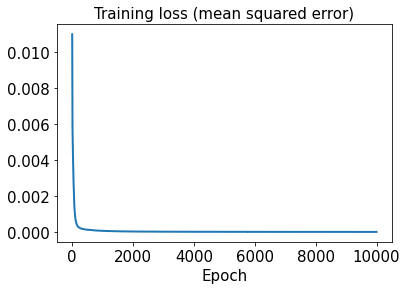

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

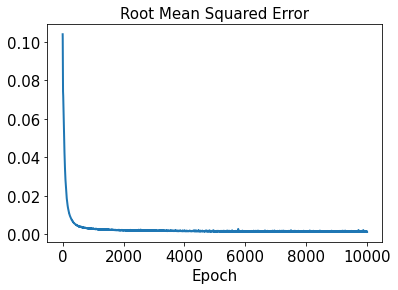

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.8706e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0009714931


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.012895529


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00097560167, 0.000693448, 0.00022392454, 0.0007773678, 0.00039347747, 0.0003441676, 0.0007216153, 0.0005718718, 0.00036814093, 0.002055959, 0.0016231262, 0.00066512567, 0.0008988873, 0.0008860412, 0.0022068035, 0.0003513393, 0.00084566337, 0.00060636917, 0.00056043704, 0.0009401807, 0.00085147907, 0.0008898514, 0.0004299653, 0.0018529153, 0.00041469096, 0.00048173888, 0.0005460024, 0.0015547406, 0.0014245701, 0.00030352065, 0.00058993686, 0.00058329484, 0.0009999019, 0.00069420936, 0.0009981189, 0.00020107011, 0.0014642215, 0.0011289358, 0.0007460873, 0.0015667017, 0.00035564316, 0.0010077966, 0.0006252237, 0.0016152955, 0.0013485717, 0.00050024316, 0.00085141277, 0.00065876293, 0.00036089038, 0.0003177287, 0.0005071116, 0.0006254414, 0.00026001674, 0.00086273265, 0.0009959697, 0.0006058762, 0.0008334411, 0.0010735096, 0.0014724968, 0.0005276264, 0.00020818482, 0.0007299482, 0.00042636995, 0.0005708309, 0.00064026745, 0.0009971261, 0.0015840263, 0.001269996, 0.0004924481, 0.00055146

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.03838437, 0.012654866, 0.0019394901, 0.0006482122, 0.0016103261, 0.027309146, 0.01777924, 0.0014856596, 0.0009102412, 0.0019830768, 0.11521544, 0.015517251, 0.0023599202, 0.0009633213, 0.00076208904, 0.011791206, 0.0010398455, 0.0042277263, 0.19086786, 0.0019228264, 0.0043129865, 0.0006377185, 0.0016300966, 0.0009832848, 0.0015152742, 0.004925533, 0.0027435813, 0.003137332, 0.00129413, 0.0031589547, 0.0008724948, 0.0032045115, 0.0012372684, 0.0012372378, 0.001107194, 0.014892628, 0.0027575279, 0.0015049289, 0.022356743, 0.0016721992, 0.0026413384, 0.0036414901, 0.0044370983, 0.0043551247]


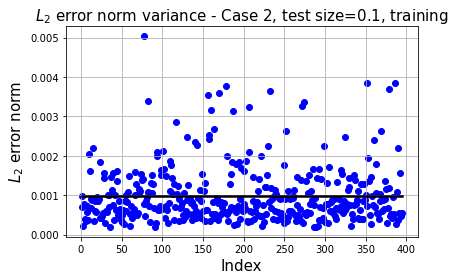

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

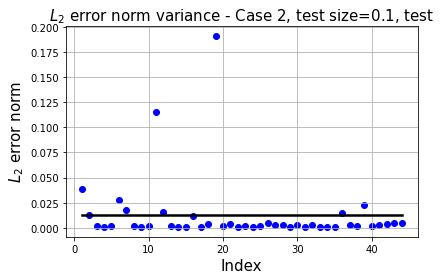

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

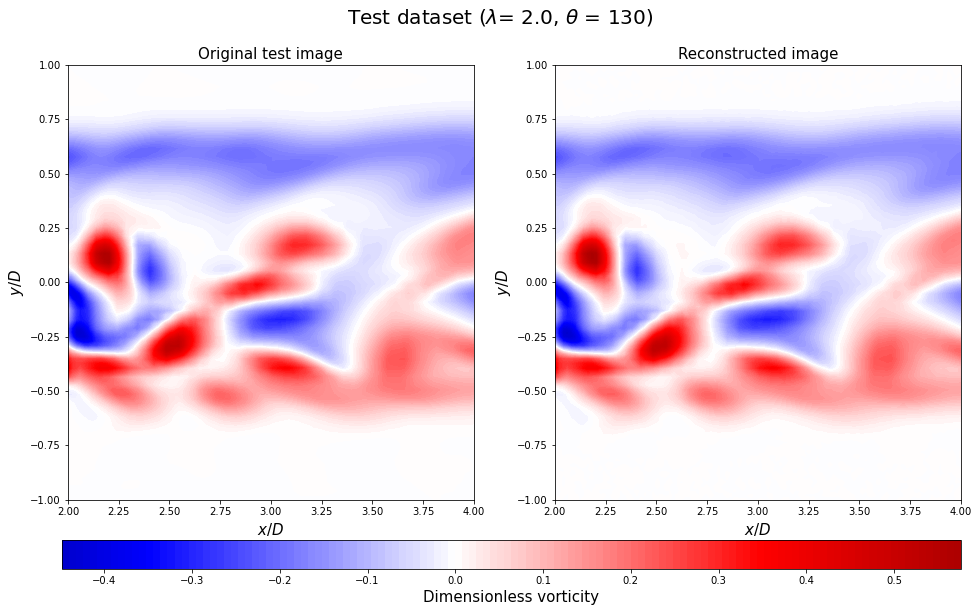

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

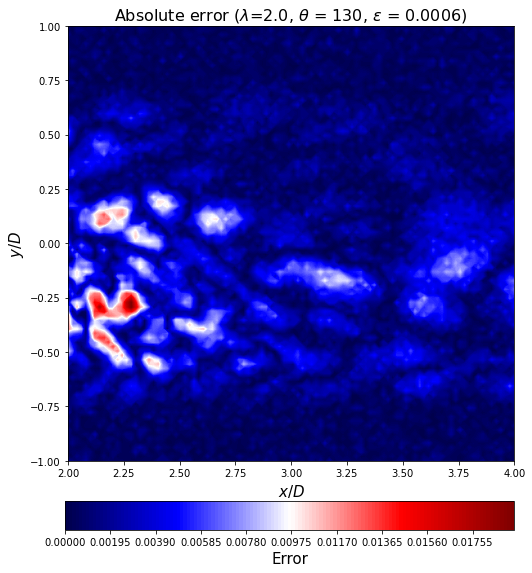

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()